## Comprehensive Allocation and Portfolio Trading Solution (CAPTS)
### Step 1: Asset Selection and Data Collection

In this first step, we define the asset classes, tickers, and time range for the financial data. The application uses this information to create a DataFrame of historical trading data for analysis.

Description:

1. Define the list of tickers for each asset class: cryptocurrencies, stocks, commodities, and bonds.
2. Combine all tickers into a single list.
3. Retrieve the historical data for each ticker using Yahoo Finance API.
4. Extract the first trading date for each ticker.
5. Create a Pandas DataFrame with the tickers and their corresponding first trading dates.
6. Sort the DataFrame by the first trading date in ascending order.
7. Display the entire DataFrame.
8. Set the time range for the data (in this case, from '2020-10-14' to '2023-03-22').
9. Fetch the asset data for the selected time range using a custom fetch_asset_data function.


In [332]:
#Import dependencies
import streamlit as st
import datetime
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
import pyfolio as pf
from IPython.display import display, HTML
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import warnings

# Set display options for Pandas
pd.set_option('display.max_colwidth', None)
pd.set_option('expand_frame_repr', False)
# Filter warnings related to pandas
warnings.filterwarnings("ignore", category=UserWarning, module="pandas")


In [333]:
# Prompt user to choose assets in asset classes
crypto_tickers = ['AAVE-USD', 'ALGO-USD', 'BAT-USD', 'BCH-USD', 'BTC-USD', 'DAI-USD', 'ETH-USD', 'LINK-USD', 'LTC-USD', 'MATIC-USD', 'MKR-USD', 'NEAR-USD', 'PAXG-USD', 'SOL-USD', 'TRX-USD', 'USDT-USD ', 'WBTC-USD'] 
stocks_tickers = ['SPY', 'QQQ', 'IWM', 'VTI', 'VOO', 'VO', 'VB', 'VEA', 'VWO', 'XLF ', 'XLV', 'XLE', 'XLY', 'XLC', 'XLK', 'XLI', 'XLP', 'XLB', 'XLU', 'XLRE']
commodities_tickers = ['GLD', 'SLV', 'USO', 'UNG', 'DBA', 'DBC', 'GSG', 'IAU ', 'PPLT', 'SIVR', 'MOO', 'NIB', 'JO', 'JJG', 'WEAT', 'UGA', 'DBE', 'REMX', 'OIL']
bonds_tickers = ['AGG', 'BND', 'TLT', 'IEF', 'SHY', 'LQD', 'HYG', 'JNK', 'MUB', 'TIP', 'BNDX', 'EMB', 'VWOB', 'PFF', 'BKLN', 'FLOT', 'GSY', 'SCHO', 'SCHR', 'SCHZ']



In [334]:
# Function to fetch asset data using yfinance
def fetch_asset_data(api_pull, start_date, end_date):
    data_frames = [] # Initialize an empty list to store data frames

    # Iterate over asset classes and their corresponding tickers
    for asset_class, tickers in api_pull.items():
        for ticker in tickers:
            # Download historical data for each ticker within the specified date range
            historical_data = yf.download(ticker, start=start_date, end=end_date)
            historical_data['Asset Class'] = asset_class # Add a column indicating the asset class
            historical_data['Ticker'] = ticker # Add a column indicating the ticker
            data_frames.append(historical_data) # Append the data frame to the list

    # Concatenate all data frames in the list into a single data frame
    combined_data = pd.concat(data_frames)
    return combined_data

In [335]:
# Combine all tickers into a single list
all_tickers = crypto_tickers + stocks_tickers + commodities_tickers + bonds_tickers

first_trading_dates = []

# Iterate through each ticker
for ticker in all_tickers:
    # Download the ticker's historical data
    data = yf.download(ticker, start='2000-01-01', end='2023-04-06', progress=False)
    # Extract the first trading date
    first_date = data.index[0].strftime('%Y-%m-%d')
    # Append the ticker and its first trading date to the list
    first_trading_dates.append((ticker, first_date))

# Create a Pandas DataFrame with the tickers and their corresponding first trading dates
df = pd.DataFrame(first_trading_dates, columns=['Ticker', 'First Trading Date'])


In [336]:
#Display whole df and sort the firts tradig date 
pd.options.display.max_rows = None
df = df.sort_values(by='First Trading Date', ascending=True)
df

Ticker First Trading Date
28        XLE         2000-01-03
26       XLF          2000-01-03
27        XLV         2000-01-03
17        SPY         2000-01-03
29        XLY         2000-01-03
31        XLK         2000-01-03
18        QQQ         2000-01-03
33        XLP         2000-01-03
34        XLB         2000-01-03
35        XLU         2000-01-03
32        XLI         2000-01-03
19        IWM         2000-05-26
20        VTI         2001-06-15
60        SHY         2002-07-30
59        IEF         2002-07-30
58        TLT         2002-07-30
61        LQD         2002-07-30
56        AGG         2003-09-29
65        TIP         2003-12-05
22         VO         2004-01-30
23         VB         2004-01-30
37        GLD         2004-11-18
44       IAU          2005-01-28
25        VWO         2005-03-10
42        DBC         2006-02-06
39        USO         2006-04-10
38        SLV         2006-04-28
43        GSG         2006-07-21
53        DBE         2007-01-05
41        DBA         2007-01-05
69        PFF         2007-03-30
57        BND         2007-04-10
62        HYG         2007-04-11
40        UNG         2007-04-18
24        VEA         2007-07-26
47        MOO         2007-09-05
64        MUB         2007-09-10
63        JNK         2007-12-04
67        EMB         2007-12-19
72        GSY         2008-02-12
52        UGA         2008-02-28
48        NIB         2008-06-25
46       SIVR         2009-07-24
45       PPLT         2010-01-08
73       SCHO         2010-08-05
74       SCHR         2010-08-05
21        VOO         2010-09-09
54       REMX         2010-10-28
70       BKLN         2011-03-03
55        OIL         2011-04-21
71       FLOT         2011-06-17
75       SCHZ         2011-07-14
51       WEAT         2011-09-19
68       VWOB         2013-06-04
66       BNDX         2013-06-04
8     LTC-USD         2014-09-17
4     BTC-USD         2014-09-17
36       XLRE         2015-10-08
7    LINK-USD         2017-11-09
6     ETH-USD         2017-11-09
3     BCH-USD         2017-11-09
14    TRX-USD         2017-11-09
15  USDT-USD          2017-11-09
2     BAT-USD         2017-11-09
10    MKR-USD         2017-11-20
50        JJG         2018-01-30
49         JO         2018-02-01
30        XLC         2018-06-19
16   WBTC-USD         2019-01-30
9   MATIC-USD         2019-04-28
1    ALGO-USD         2019-06-21
12   PAXG-USD         2019-09-26
5     DAI-USD         2019-11-22
13    SOL-USD         2020-04-10
0    AAVE-USD         2020-10-02
11   NEAR-USD         2020-10-14

In [337]:
# Define the tickers for each asset class.
api_pull = {'crypto': crypto_tickers,
            'stocks': stocks_tickers,
            'commodities': commodities_tickers,
            'bonds': bonds_tickers}

In [339]:
# Define the time range for the data
selected_start_date = '2020-10-14'
selected_end_date = '2023-03-22'

data = fetch_asset_data(api_pull, selected_start_date, selected_end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

### Step 2: Data Cleaning and Analysis

In this step, we analyze the historical trading data for any NaN or zero values. This helps ensure the data is clean and reliable for further processing.

Description:

1. Reset the index of the DataFrame and set a new index with multiple columns: 'Asset Class', 'Ticker', and 'Date'.
2. Define a function check_nan_and_zero_values that takes a DataFrame as input and performs the following tasks:
a. Iterates through each unique ticker in the DataFrame.
b. Filters the data for the current ticker.
c. Identifies the dates with NaN values and zero values.
d. Appends the ticker, type of value (NaN or 0), and the corresponding date to a list.
3. Call the check_nan_and_zero_values function to analyze the data for NaN and zero values.

In [340]:
data.head()


Open       High        Low      Close  Adj Close    Volume Asset Class    Ticker
Date                                                                                             
2020-10-14  51.372898  57.853947  49.629528  51.316517  51.316517   3132405      crypto  AAVE-USD
2020-10-15  51.387611  52.080685  44.018326  44.019184  44.019184   5883146      crypto  AAVE-USD
2020-10-16  42.890606  43.906731  39.142956  39.495846  39.495846  52855205      crypto  AAVE-USD
2020-10-17  39.486191  43.077374  38.633614  41.366993  41.366993  43339687      crypto  AAVE-USD
2020-10-18  41.389599  41.749489  39.531586  40.746971  40.746971  40441163      crypto  AAVE-USD

In [341]:
#Reset the index of a DataFrame and set a new index with multiple columns
data = data.reset_index().set_index(['Asset Class', 'Ticker','Date'])

In [342]:
display(data.head(30))
data.tail(10)

Open       High        Low      Close  Adj Close     Volume
Asset Class Ticker   Date                                                                        
crypto      AAVE-USD 2020-10-14  51.372898  57.853947  49.629528  51.316517  51.316517    3132405
                     2020-10-15  51.387611  52.080685  44.018326  44.019184  44.019184    5883146
                     2020-10-16  42.890606  43.906731  39.142956  39.495846  39.495846   52855205
                     2020-10-17  39.486191  43.077374  38.633614  41.366993  41.366993   43339687
                     2020-10-18  41.389599  41.749489  39.531586  40.746971  40.746971   40441163
                     2020-10-19  40.836758  40.995186  35.951363  36.012318  36.012318   49289897
                     2020-10-20  36.043785  36.319069  32.101101  32.180016  32.180016   60632326
                     2020-10-21  32.253490  37.078201  32.048149  35.160358  35.160358   43831235
                     2020-10-22  35.097488  39.856922  33.589462  38.031651  38.031651   54717366
                     2020-10-23  37.730595  42.546658  36.924671  41.686638  41.686638   76081860
                     2020-10-24  41.686638  42.439705  38.728821  39.455021  39.455021   57658170
                     2020-10-25  39.455021  40.928509  37.601200  37.904762  37.904762   43970452
                     2020-10-26  37.904762  39.163864  35.071968  36.033920  36.033920   50307223
                     2020-10-27  36.033913  38.869183  34.469635  34.871532  34.871532   58581308
                     2020-10-28  34.871536  35.564022  32.000057  32.394081  32.394081   60533867
                     2020-10-29  32.394081  33.155483  28.240772  29.098333  29.098333   66304786
                     2020-10-30  29.098341  31.980774  27.792461  31.217823  31.217823   77280724
                     2020-10-31  31.217823  32.900162  29.610258  29.707518  29.707518   58631072
                     2020-11-01  29.707518  31.067060  28.494482  30.657276  30.657276   49568339
                     2020-11-02  30.657282  33.923584  29.344650  29.731524  29.731524   87180146
                     2020-11-03  29.731525  30.062918  27.537111  28.042803  28.042803   56775012
                     2020-11-04  28.042971  28.433069  26.089518  27.715084  27.715084   50464691
                     2020-11-05  27.715080  32.303040  25.966154  30.955627  30.955627   85212412
                     2020-11-06  30.955118  40.769073  30.855127  38.457439  38.457439  147304661
                     2020-11-07  38.457439  51.427994  38.457439  44.604900  44.604900  200580054
                     2020-11-08  44.604900  54.786362  42.864254  53.749378  53.749378  174706009
                     2020-11-09  53.749374  58.364113  49.860130  54.886501  54.886501  386011348
                     2020-11-10  54.886505  70.309822  53.179035  67.001114  67.001114  433793206
                     2020-11-11  67.001114  68.778595  53.716755  54.699646  54.699646  354136841
                     2020-11-12  54.699623  59.618317  50.523102  51.632420  51.632420  244505562

Open       High        Low      Close  Adj Close  Volume
Asset Class Ticker Date                                                                     
bonds       SCHZ   2023-03-08  45.610001  45.700001  45.419998  45.480000  45.357838  624100
                   2023-03-09  45.520000  45.740002  45.509998  45.639999  45.517410  465500
                   2023-03-10  45.990002  46.290001  45.990002  46.180000  46.055962  624200
                   2023-03-13  46.610001  46.910000  46.419998  46.529999  46.405018  705600
                   2023-03-14  46.529999  46.529999  46.189999  46.290001  46.165665  535200
                   2023-03-15  46.720001  46.930000  46.529999  46.740002  46.614456  603600
                   2023-03-16  46.950001  46.959999  46.459999  46.520000  46.395046  992500
                   2023-03-17  46.709999  47.000000  46.709999  46.869999  46.744106  989600
                   2023-03-20  46.959999  46.959999  46.630001  46.700001  46.574562  709300
                   2023-03-21  46.500000  46.639999  46.480000  46.540001  46.414993  987500

In [27]:
data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [28]:
# Check for 0s in the DataFrame
zero_count = np.count_nonzero(data.values == 0)
zero_count

0

In [29]:
# Check if any assset rows have value of 0
data[data==0].index.get_level_values(1).unique()

Index(['AAVE-USD', 'ALGO-USD', 'BAT-USD', 'BCH-USD', 'BTC-USD', 'DAI-USD',
       'ETH-USD', 'LINK-USD', 'LTC-USD', 'MATIC-USD', 'MKR-USD', 'NEAR-USD',
       'PAXG-USD', 'SOL-USD', 'TRX-USD', 'USDT-USD ', 'WBTC-USD', 'SPY', 'QQQ',
       'IWM', 'VTI', 'VOO', 'VO', 'VB', 'VEA', 'VWO', 'XLF ', 'XLV', 'XLE',
       'XLY', 'XLC', 'XLK', 'XLI', 'XLP', 'XLB', 'XLU', 'XLRE', 'GLD', 'SLV',
       'USO', 'UNG', 'DBA', 'DBC', 'GSG', 'IAU ', 'PPLT', 'SIVR', 'MOO', 'NIB',
       'JO', 'JJG', 'WEAT', 'UGA', 'DBE', 'REMX', 'OIL', 'AGG', 'BND', 'TLT',
       'IEF', 'SHY', 'LQD', 'HYG', 'JNK', 'MUB', 'TIP', 'BNDX', 'EMB', 'VWOB',
       'PFF', 'BKLN', 'FLOT', 'GSY', 'SCHO', 'SCHR', 'SCHZ'],
      dtype='object', name='Ticker')

In [30]:
"""
Analize df for NaN and zero values. 
Print df containing the ticker name, zero values, NaN values, and dates for each ticker.
"""
def check_nan_and_zero_values(df):
    tickers = df.index.get_level_values('Ticker').unique()
    results = []

    for ticker in tickers:
        ticker_data = df.loc[pd.IndexSlice[:, ticker, :], :]
        nan_dates = ticker_data[ticker_data.isna().any(axis=1)].index.get_level_values('Date').tolist()
        zero_dates = ticker_data[(ticker_data == 0).any(axis=1)].index.get_level_values('Date').tolist()

        for date in nan_dates:
            results.append({"Ticker": ticker, "Value": "NaN", "Date": date})
        
        for date in zero_dates:
            results.append({"Ticker": ticker, "Value": "0", "Date": date})

    results_count_df = pd.DataFrame(results)
    return results_count_df



In [31]:
# Call the function to check for NaN and zero values in the data frame
results_count_df = check_nan_and_zero_values(data)
results_count_df.head(10)

Empty DataFrame
Columns: []
Index: []

In [32]:
#Remane column
data = data.rename(columns={"Adj Close": "Adj_Close"})

In [33]:
data.head()


Open       High        Low      Close  Adj_Close    Volume
Asset Class Ticker   Date                                                                       
crypto      AAVE-USD 2020-10-14  51.372898  57.853947  49.629528  51.316517  51.316517   3132405
                     2020-10-15  51.387611  52.080685  44.018326  44.019184  44.019184   5883146
                     2020-10-16  42.890606  43.906731  39.142956  39.495846  39.495846  52855205
                     2020-10-17  39.486191  43.077374  38.633614  41.366993  41.366993  43339687
                     2020-10-18  41.389599  41.749489  39.531586  40.746971  40.746971  40441163

### Step 3: Calculate Logarithmic Returns for Each Asset

In this step, we calculate the logarithmic returns for each asset in the dataset. This provides a measure of the asset's performance over time and is essential for portfolio optimization and analysis.

Description:

1. Define a function calculate_log_returns that takes a DataFrame as input and performs the following tasks:
* Check if the 'Adj Close' column is present in the DataFrame.
* If the 'Adj Close' column is present, calculate the logarithmic returns using this column.
* If the 'Adj Close' column is not present, calculate the logarithmic returns using the 'Close' column.
2. Apply the calculate_log_returns function to each group of asset classes and tickers in the DataFrame.
3. Store the calculated logarithmic returns in a new column named "Returns" in the DataFrame.

In [37]:
"""
Calculate the logarithmic returns of an asset.
If the 'Adj Close' column is present, use it for calculating log. returns.
Otherwise use the 'Close' column
"""

def calculate_log_returns(df):
    
    if 'Adj Close' in df.columns:
        return np.log(1 + df['Adj Close'].pct_change())    
    else:
        return np.log(1 + df['Close'].pct_change())
    

# data.groupby(['Asset Class', 'Ticker'], group_keys=False).apply(o_c_pct_change)
data["Returns"] = data.groupby(['Asset Class', 'Ticker'], group_keys=False).apply(calculate_log_returns)


In [38]:
display(data.head(20))
data.tail(20)

Open       High        Low      Close  Adj_Close    Volume   Returns
Asset Class Ticker   Date                                                                                 
crypto      AAVE-USD 2020-10-14  51.372898  57.853947  49.629528  51.316517  51.316517   3132405       NaN
                     2020-10-15  51.387611  52.080685  44.018326  44.019184  44.019184   5883146 -0.153387
                     2020-10-16  42.890606  43.906731  39.142956  39.495846  39.495846  52855205 -0.108430
                     2020-10-17  39.486191  43.077374  38.633614  41.366993  41.366993  43339687  0.046288
                     2020-10-18  41.389599  41.749489  39.531586  40.746971  40.746971  40441163 -0.015102
                     2020-10-19  40.836758  40.995186  35.951363  36.012318  36.012318  49289897 -0.123520
                     2020-10-20  36.043785  36.319069  32.101101  32.180016  32.180016  60632326 -0.112515
                     2020-10-21  32.253490  37.078201  32.048149  35.160358  35.160358  43831235  0.088574
                     2020-10-22  35.097488  39.856922  33.589462  38.031651  38.031651  54717366  0.078499
                     2020-10-23  37.730595  42.546658  36.924671  41.686638  41.686638  76081860  0.091762
                     2020-10-24  41.686638  42.439705  38.728821  39.455021  39.455021  57658170 -0.055019
                     2020-10-25  39.455021  40.928509  37.601200  37.904762  37.904762  43970452 -0.040085
                     2020-10-26  37.904762  39.163864  35.071968  36.033920  36.033920  50307223 -0.050616
                     2020-10-27  36.033913  38.869183  34.469635  34.871532  34.871532  58581308 -0.032790
                     2020-10-28  34.871536  35.564022  32.000057  32.394081  32.394081  60533867 -0.073695
                     2020-10-29  32.394081  33.155483  28.240772  29.098333  29.098333  66304786 -0.107295
                     2020-10-30  29.098341  31.980774  27.792461  31.217823  31.217823  77280724  0.070308
                     2020-10-31  31.217823  32.900162  29.610258  29.707518  29.707518  58631072 -0.049589
                     2020-11-01  29.707518  31.067060  28.494482  30.657276  30.657276  49568339  0.031470
                     2020-11-02  30.657282  33.923584  29.344650  29.731524  29.731524  87180146 -0.030662

Open       High        Low      Close  Adj_Close   Volume   Returns
Asset Class Ticker Date                                                                                
bonds       SCHZ   2023-02-22  45.840000  45.930000  45.790001  45.810001  45.573338  1119500  0.002623
                   2023-02-23  45.849998  46.009998  45.660000  46.009998  45.772301  1060800  0.004356
                   2023-02-24  45.759998  45.770000  45.639999  45.720001  45.483799   804500 -0.006323
                   2023-02-27  45.849998  45.880001  45.759998  45.799999  45.563385   388600  0.001748
                   2023-02-28  45.700001  45.849998  45.650002  45.840000  45.603180  1149500  0.000873
                   2023-03-01  45.599998  45.610001  45.419998  45.450001  45.327923   854700 -0.008544
                   2023-03-02  45.360001  45.360001  45.240002  45.330002  45.208244   805100 -0.002644
                   2023-03-03  45.560001  45.700001  45.470001  45.700001  45.577248   371200  0.008129
                   2023-03-06  45.750000  45.790001  45.560001  45.570000  45.447598   355300 -0.002849
                   2023-03-07  45.660000  45.669998  45.450001  45.500000  45.377785  1004500 -0.001537
                   2023-03-08  45.610001  45.700001  45.419998  45.480000  45.357838   624100 -0.000440
                   2023-03-09  45.520000  45.740002  45.509998  45.639999  45.517410   465500  0.003512
                   2023-03-10  45.990002  46.290001  45.990002  46.180000  46.055962   624200  0.011762
                   2023-03-13  46.610001  46.910000  46.419998  46.529999  46.405018   705600  0.007550
                   2023-03-14  46.529999  46.529999  46.189999  46.290001  46.165665   535200 -0.005171
                   2023-03-15  46.720001  46.930000  46.529999  46.740002  46.614456   603600  0.009674
                   2023-03-16  46.950001  46.959999  46.459999  46.520000  46.395046   992500 -0.004718
                   2023-03-17  46.709999  47.000000  46.709999  46.869999  46.744106   989600  0.007495
                   2023-03-20  46.959999  46.959999  46.630001  46.700001  46.574562   709300 -0.003634
                   2023-03-21  46.500000  46.639999  46.480000  46.540001  46.414993   987500 -0.003432

In [39]:
#Check for NaN values 
data.isna().sum()

Open          0
High          0
Low           0
Close         0
Adj_Close     0
Volume        0
Returns      76
dtype: int64

### Step 4:Transpose the data DataFrame
Define a function `transpose_df` that takes in a pandas dataframe df and an asset_class string as input. The goal of the function is to transpose a subset of the dataframe based on the given asset_class and return the resulting pivoted dataframe with NaN values removed.

In [40]:
#Define function 
 # Selects data from the dataframe based on the given asset_class and Returns columns
def transpose_df(df, asset_class):
    df_data = df.loc[(asset_class),['Returns']].reset_index()

    # Pivot the dataframe with index as 'Ticker', columns as 'Date', and values as 'Returns'
    df_data_pivot = df_data.pivot(index='Ticker',columns='Date', values='Returns')

    # Drop columns containing any NaN values from the pivoted dataframe
    df_data_pivot = df_data_pivot.dropna(axis=1)
    return df_data_pivot



In [41]:

# Call transpose_df function and ranspose data subset for all asset classes, store in a new dataframe
df_crypto_data_transposed = transpose_df(data,'crypto')
df_stocks_data_transposed = transpose_df(data,'stocks')
df_commodities_data_transposed = transpose_df(data,'commodities')
df_bonds_data_transposed = transpose_df(data,'bonds')

In [44]:
#Review transposed DataFrame for crypto assets 
df_crypto_data_transposed


Date       2020-10-15  2020-10-16  2020-10-17  2020-10-18  2020-10-19  2020-10-20  2020-10-21  2020-10-22  2020-10-23  2020-10-24  ...  2023-03-12  2023-03-13  2023-03-14  2023-03-15  2023-03-16  2023-03-17  2023-03-18  2023-03-19  2023-03-20  2023-03-21
Ticker                                                                                                                             ...                                                                                                                        
AAVE-USD    -0.153387   -0.108430    0.046288   -0.015102   -0.123520   -0.112515    0.088574    0.078499    0.091762   -0.055019  ...    0.079546    0.042564    0.041045   -0.069440    0.014093    0.071859   -0.036130    0.022970   -0.044166    0.037100
ALGO-USD    -0.036625   -0.052106    0.043541    0.011925   -0.043294   -0.052727    0.048412    0.044629   -0.021238   -0.004266  ...    0.067286    0.050767    0.044997   -0.083579    0.020757    0.082869   -0.052225    0.024458   -0.050270    0.066129
BAT-USD     -0.009601   -0.028967    0.036172   -0.003900    0.001644   -0.026485    0.029207    0.029983   -0.006866    0.005510  ...    0.074826    0.057636    0.044676   -0.077281    0.019404    0.085176   -0.039028    0.037944   -0.039704    0.028248
BCH-USD      0.008650   -0.043232   -0.016130    0.014078    0.003587   -0.031870    0.062526    0.030319    0.014315    0.017628  ...    0.056855    0.048577    0.033567   -0.062009    0.021323    0.072324   -0.032165    0.036023   -0.041412    0.029111
BTC-USD      0.005744   -0.015184    0.003173    0.010968    0.022276    0.014735    0.073384    0.011028   -0.002653    0.013558  ...    0.071604    0.087784    0.022416   -0.015069    0.027388    0.090431   -0.016844    0.039013   -0.009728    0.014607
DAI-USD      0.003123   -0.002023   -0.001756   -0.000822    0.005126   -0.003665   -0.000085    0.000138    0.000329   -0.008978  ...    0.019036    0.006358    0.000061    0.000188    0.000231    0.001078   -0.002316    0.000149   -0.001506    0.002242
ETH-USD     -0.005396   -0.030158    0.007147    0.025053    0.004542   -0.028834    0.060579    0.053571   -0.009730    0.006545  ...    0.070110    0.055059    0.013711   -0.028175    0.012621    0.066468   -0.017347    0.013485   -0.028549    0.040343
LINK-USD    -0.019492   -0.011069    0.003100    0.021195    0.000512   -0.097133    0.089603    0.099866    0.018626    0.045619  ...    0.059714    0.027893    0.029025   -0.062838    0.018666    0.079303   -0.041224    0.024091   -0.006341    0.048378
LTC-USD     -0.007170   -0.036996   -0.013488    0.011949    0.010016   -0.022027    0.119914    0.022775    0.017742    0.067493  ...    0.090528    0.069061    0.031092   -0.098630    0.033774    0.078418   -0.029899    0.017350   -0.073858    0.053510
MATIC-USD   -0.002614   -0.056050    0.029643    0.008624   -0.041224   -0.036000    0.046924    0.060456   -0.021137    0.037040  ...    0.083520    0.030986    0.006148   -0.074779    0.032235    0.062121   -0.044152   -0.002269   -0.057084    0.046376
MKR-USD     -0.008630   -0.020481    0.020188    0.029280   -0.002855   -0.038822    0.033010    0.040550    0.001254    0.011435  ...    0.215338    0.008469   -0.055624   -0.142308   -0.055061    0.030592   -0.061528    0.003460   -0.028844    0.035144
NEAR-USD    -0.052145   -0.319769   -0.011534    0.075685   -0.085346   -0.168786    0.036804    0.065964   -0.028327    0.014674  ...    0.074404    0.046759    0.038036   -0.096416    0.021964    0.094620   -0.039434    0.027914   -0.069871    0.039127
PAXG-USD     0.001917   -0.002297   -0.003785    0.001764    0.001931    0.000810    0.011460   -0.008752    0.001672    0.002168  ...    0.008094    0.004890   -0.008985    0.009478   -0.008776    0.027399   -0.000899    0.006131    0.003643   -0.016503
SOL-USD     -0.021043   -0.053026    0.024113    0.005627   -0.073148   -0.085900    0.000903    0.033947    0.002238   -0.024902  ...    0.108299    0.006047    0.023904   -0

In [46]:
#Review transposed DataFrame for stock assets 
df_stocks_data_transposed

Date    2020-10-15  2020-10-16  2020-10-19  2020-10-20  2020-10-21  2020-10-22  2020-10-23  2020-10-26  2020-10-27  2020-10-28  ...  2023-03-08  2023-03-09  2023-03-10  2023-03-13  2023-03-14  2023-03-15  2023-03-16  2023-03-17  2023-03-20  2023-03-21
Ticker                                                                                                                          ...                                                                                                                        
IWM       0.010252   -0.002461   -0.012021    0.002179   -0.008621    0.017107    0.005781   -0.021822   -0.008624   -0.031272  ...    0.000482   -0.028208   -0.029254   -0.016424    0.018352   -0.016623    0.013559   -0.027363    0.012882    0.018281
QQQ      -0.006734   -0.005496   -0.016460    0.002147   -0.000774   -0.000035    0.001969   -0.015110    0.007778   -0.039767  ...    0.004982   -0.017478   -0.014143    0.007389    0.022720    0.005232    0.026019   -0.004737    0.001996    0.014181
SPY      -0.001237   -0.000604   -0.015320    0.003998   -0.001895    0.005470    0.003389   -0.018653   -0.003453   -0.034777  ...    0.001631   -0.018622   -0.014535   -0.001426    0.016395   -0.006274    0.017393   -0.015571    0.009570    0.013045
VB        0.006645   -0.002773   -0.011903    0.003903   -0.008066    0.016067    0.006199   -0.022082   -0.009553   -0.029857  ...    0.000051   -0.026892   -0.030215   -0.018797    0.017019   -0.019380    0.013866   -0.023532    0.013561    0.018607
VEA      -0.011042    0.003133   -0.004341    0.005543   -0.003370    0.000964    0.005526   -0.018864   -0.007597   -0.029711  ...    0.005185   -0.009944   -0.009814   -0.005750    0.011696   -0.030323    0.015392   -0.011639    0.011407    0.012880
VO        0.002960   -0.001183   -0.012450    0.003426   -0.002936    0.009051    0.008863   -0.020803   -0.006628   -0.030186  ...    0.002332   -0.024378   -0.026653   -0.008220    0.014037   -0.016710    0.014026   -0.018048    0.012117    0.015367
VOO      -0.001190   -0.000846   -0.015225    0.003939   -0.001809    0.005480    0.003406   -0.018588   -0.003309   -0.035037  ...    0.001556   -0.018475   -0.014444   -0.001693    0.016470   -0.006186    0.016963   -0.010998    0.008990    0.012996
VTI       0.000337   -0.001801   -0.014409    0.003479   -0.003422    0.007060    0.003285   -0.018319   -0.004040   -0.033696  ...    0.001297   -0.019945   -0.016982   -0.004148    0.017665   -0.007738    0.017138   -0.012980    0.008672    0.014171
VWO      -0.008046    0.004031   -0.003134    0.010039    0.001996    0.000222    0.004640   -0.013092    0.003567   -0.025244  ...    0.005243   -0.020630   -0.005608   -0.001023    0.000512   -0.016764    0.012663   -0.005149    0.001032    0.010517
XLB      -0.002883    0.006965   -0.011687    0.002287   -0.003815    0.005490    0.003643   -0.025318   -0.009525   -0.028646  ...    0.004891   -0.026072   -0.021512   -0.010286    0.012713   -0.032947    0.011408   -0.015637    0.016028    0.012048
XLC      -0.007704    0.000165   -0.018096    0.007178    0.016660    0.006522    0.009382   -0.022140    0.006399   -0.040045  ...    0.000553   -0.022754   -0.014249    0.000000    0.027926    0.010735    0.022211   -0.009589    0.004715    0.021125
XLE       0.012050   -0.022922   -0.021427    0.011775   -0.019248    0.040426   -0.004924   -0.036526   -0.013054   -0.042740  ...   -0.010312   -0.014235   -0.012866   -0.020541    0.009834   -0.055196    0.010800   -0.015854    0.009439    0.034035
XLF       0.007638    0.000801   -0.015323    0.008094   -0.005254    0.019660    0.003173   -0.022833   -0.018402   -0.025921  ...   -0.003712   -0.041466   -0.018355   -0.040278    0.020032   -0.027012    0.018922   -0.032706    0.006114    0.025029
XLI       0.003586    0.007257   -0.012455    0.005198   -0.010174    0.008197    0.003950   -0.025327   -0.022102   -0.033363  ...    0.002347   -0.014857   -0.018812   -0.005673    0.010509   -0.024936    0.012800   -0

In [47]:
#Review transposed DataFrame for commodities
df_commodities_data_transposed 

Date    2020-10-15  2020-10-16  2020-10-19  2020-10-20  2020-10-21  2020-10-22  2020-10-23  2020-10-26  2020-10-27  2020-10-28  ...  2023-03-08  2023-03-09  2023-03-10  2023-03-13  2023-03-14  2023-03-15  2023-03-16  2023-03-17  2023-03-20  2023-03-21
Ticker                                                                                                                          ...                                                                                                                        
DBA      -0.001344   -0.003368    0.004040   -0.000672    0.000672    0.002685    0.001340   -0.003352   -0.006739   -0.013615  ...   -0.007446   -0.005997    0.004002   -0.005005    0.000000   -0.011100    0.007078   -0.001008   -0.000504    0.001009
DBC       0.002999   -0.006759    0.000753    0.011232   -0.008224    0.002999   -0.007513   -0.014432    0.006862   -0.026956  ...   -0.005468   -0.012307    0.010618   -0.006357   -0.012837   -0.023530    0.003082   -0.003082    0.003960    0.003507
DBE      -0.003069   -0.008230   -0.005179    0.012384   -0.023872    0.011488   -0.015699   -0.023480    0.019252   -0.043297  ...   -0.012632   -0.019012    0.013820   -0.014780   -0.027266   -0.040287    0.005126   -0.014937    0.007754    0.014823
GLD       0.003639   -0.003471    0.000505    0.004809    0.007503   -0.009849   -0.001063   -0.000504    0.002629   -0.016275  ...   -0.000475    0.009801    0.021334    0.022689   -0.005808    0.007774    0.002018    0.028704    0.000381   -0.019056
GSG       0.005425   -0.005425   -0.003633    0.009058   -0.009968    0.003636   -0.008201   -0.016606    0.011101   -0.029881  ...   -0.005431   -0.013958    0.010487   -0.010989   -0.017735   -0.028521    0.002627   -0.008959    0.006858    0.009940
IAU       0.003858   -0.003858    0.001104    0.004952    0.008199   -0.010947   -0.000551   -0.000551    0.002751   -0.017180  ...    0.000291    0.008974    0.021666    0.023137   -0.006081    0.007458    0.002474    0.028682    0.000267   -0.018843
JJG       0.023408   -0.006265    0.001644    0.013322    0.006213   -0.004076    0.018567   -0.015008   -0.005178   -0.022574  ...   -0.007063   -0.015994    0.009361   -0.009292    0.012511    0.003932    0.002884    0.001697   -0.000597   -0.012096
JO        0.000906   -0.029734   -0.000156   -0.013945   -0.011744    0.026404   -0.007742    0.013695   -0.004182   -0.017378  ...   -0.031168   -0.009234    0.010843    0.011037   -0.019504   -0.014340    0.038526   -0.015092    0.008060    0.011403
MOO      -0.001152    0.001008   -0.008532    0.001161    0.000725    0.002317    0.002311   -0.015705   -0.004996   -0.023699  ...    0.008665   -0.020717   -0.024432   -0.010132    0.015276   -0.029228    0.005270   -0.011896    0.014401    0.018065
NIB      -0.027544    0.015983    0.025397   -0.012444    0.016216    0.020661    0.004349    0.009302   -0.030214   -0.033619  ...   -0.009421   -0.004405   -0.010925   -0.022918    0.007349   -0.019008    0.026650    0.029660    0.018636    0.011148
OIL      -0.000812   -0.006520   -0.001637    0.013827   -0.032844    0.013267   -0.022492   -0.026463    0.018852   -0.048705  ...   -0.010929   -0.008622    0.010681   -0.027799   -0.035872   -0.046346    0.001911   -0.021224    0.013943    0.026192
PPLT      0.007156   -0.002832   -0.009290    0.020812    0.017518   -0.007573    0.025143   -0.032045    0.005453   -0.015344  ...    0.007055    0.009406    0.013720    0.042874   -0.017083   -0.027368    0.018107   -0.002107    0.014217   -0.015773
REMX     -0.006091   -0.005145    0.009778    0.008236    0.001206   -0.005073   -0.001454   -0.014659    0.009797   -0.029432  ...    0.006808   -0.017600   -0.027248   -0.015065    0.000514   -0.050089    0.014493   -0.004540    0.011312    0.017707
SIVR      0.003413   -0.007696    0.006843    0.019418    0.011224   -0.013317   -0.001258   -0.013514    0.004243   -0.042817  ...   -0.002079    0.002079    0.023096    0.058623   -0.006239    0.006239   -0.003355    0

In [48]:
#Review transposed DataFrame for bonds
df_bonds_data_transposed 

Date    2020-10-15  2020-10-16  2020-10-19  2020-10-20  2020-10-21  2020-10-22  2020-10-23  2020-10-26  2020-10-27  2020-10-28  ...  2023-03-08  2023-03-09  2023-03-10  2023-03-13  2023-03-14  2023-03-15  2023-03-16  2023-03-17  2023-03-20  2023-03-21
Ticker                                                                                                                          ...                                                                                                                        
AGG      -0.000848   -0.000509   -0.001188   -0.000850   -0.001191   -0.001789    0.001448    0.001361    0.002293   -0.001443  ...   -0.001035    0.003616    0.011587    0.007920   -0.005884    0.009921   -0.003936    0.006251   -0.004028   -0.003032
BKLN     -0.001834   -0.001378   -0.000920    0.001379   -0.002299   -0.000461    0.000000   -0.003692   -0.000462   -0.003707  ...    0.001428   -0.004291   -0.000956   -0.015422    0.006294   -0.007752    0.004368   -0.006315   -0.004396    0.008772
BND      -0.000567   -0.000795   -0.000909   -0.001706   -0.001139   -0.001711    0.001255    0.001481    0.002388   -0.001364  ...   -0.000838    0.003348    0.011905    0.007950   -0.006300    0.010251   -0.004771    0.007215   -0.004350   -0.002729
BNDX      0.000856    0.000855   -0.000342   -0.001027   -0.001885   -0.001373    0.001030    0.000858    0.001884   -0.000171  ...    0.001676    0.001046    0.009778    0.012755   -0.005946    0.007171   -0.004912    0.007155   -0.000815   -0.004905
EMB      -0.004011    0.001517   -0.005814    0.000538   -0.005123   -0.004697    0.004697   -0.003611    0.005951   -0.008578  ...   -0.004740    0.000237    0.009338   -0.001648   -0.002714    0.003656   -0.004247   -0.004503    0.000119    0.007100
FLOT     -0.000395    0.000197   -0.000197    0.000197    0.000197   -0.000197    0.000197   -0.000197    0.000000    0.000000  ...    0.000394   -0.000394   -0.000197   -0.015911    0.003402   -0.010848    0.008247   -0.000802    0.001002    0.007582
GSY       0.000198   -0.000198   -0.000396    0.000000    0.000000   -0.000198    0.000198    0.000198    0.000198   -0.000198  ...   -0.000202    0.000403    0.001410    0.002011   -0.001005    0.000402   -0.000402    0.000402   -0.003020   -0.000605
HYG      -0.000708   -0.001181   -0.003551    0.003551   -0.000118    0.001771    0.001179   -0.008876    0.000475   -0.008352  ...   -0.004729   -0.005568    0.000136   -0.005462    0.007230   -0.003268    0.006524   -0.005979   -0.002730    0.010874
IEF      -0.001071   -0.000577   -0.001651   -0.002150   -0.001326   -0.003488    0.001413    0.002655    0.002234   -0.000083  ...   -0.000316    0.006193    0.018248    0.012051   -0.009486    0.014346   -0.009031    0.011755   -0.004038   -0.008737
JNK      -0.000569   -0.002091   -0.002095    0.003426   -0.000285    0.001614    0.001043   -0.007993    0.000191   -0.008441  ...   -0.005063   -0.006199   -0.000333   -0.005122    0.007785   -0.004552    0.006544   -0.005988   -0.002673    0.011311
LQD      -0.001032   -0.001698   -0.001923   -0.002075   -0.001633   -0.002232    0.002529    0.002078    0.004069   -0.004959  ...   -0.001611   -0.000949    0.014237    0.000842   -0.002998    0.009524   -0.001488    0.005013   -0.002968    0.004818
MUB      -0.000520    0.000347    0.000000   -0.000260   -0.001041    0.000868   -0.000087    0.000087    0.001387   -0.001300  ...   -0.000665    0.002845    0.005195    0.003010   -0.002068    0.005912   -0.000655    0.003085   -0.002898   -0.003282
PFF       0.000271   -0.003528   -0.004633    0.006263   -0.007903    0.007903    0.006224   -0.008670    0.000544   -0.017559  ...    0.000000   -0.017816   -0.016855   -0.038579    0.024042   -0.020050    0.025890   -0.023900   -0.010660    0.016935
SCHO      0.000000   -0.000194    0.000000    0.000000   -0.000194    0.000000   -0.000194    0.000194    0.000000    0.000194  ...   -0.000418    0.003133    0.005615    0.009905   -0.003703    0.005959   -0.004106    0

In [49]:
#Prints the sum of all NaN values in each of the dataframes.
print(df_crypto_data_transposed.isna().sum().sum())
print(df_stocks_data_transposed.isna().sum().sum())
print(df_commodities_data_transposed.isna().sum().sum())
print(df_bonds_data_transposed.isna().sum().sum())

0
0
0
0


### Step 5: Perform Principal Component Analysis (PCA)
Apply Principal Component Analysis (PCA) on the transposed data of each asset class to reduce the dimensionality of the data while preserving most of the variability in the data.
We replace infinite values with NaN before filling missing values with the mean of the corresponding column. This ensures that no infinite values are present in the data before it is passed to the PCA function.

In [50]:
# Define function for PCA
def perform_pca(df):
    """
    Perform PCA on a given dataframe and return a dataframe of principal components.

    Parameters:
    df (pandas.DataFrame): The dataframe to perform PCA on.

    Returns:
    pandas.DataFrame: A dataframe of principal components.
    """
    # Replace NaN and infinite values with column means
    # df_clean = df.replace([np.inf, -np.inf], np.nan).fillna(df.mean())

    # Choose the number of principal components to explain 90% of the variance
    pca = PCA(n_components=0.9)

    # Fit the PCA model to the cleaned data
    pca.fit(df)

    # Transform the data into principal components
    results = pca.transform(df)

    # Create a dataframe from the principal components
    results_df = pd.DataFrame(results, index=df.index)

    # Return the dataframe of principal components
    return results_df



In [52]:
# Apply PCA function for all asset classes
crypto_pca = perform_pca(df_crypto_data_transposed)
stocks_pca = perform_pca(df_stocks_data_transposed)
commodities_pca = perform_pca(df_commodities_data_transposed)
bonds_pca = perform_pca(df_bonds_data_transposed)

/Users/lexx/opt/anaconda3/envs/dev/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp']. An error will be raised in 1.2.
  FutureWarning,
/Users/lexx/opt/anaconda3/envs/dev/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp']. An error will be raised in 1.2.
  FutureWarning,
/Users/lexx/opt/anaconda3/envs/dev/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp']. An error will be raised in 1.2.
  FutureWarning,
/Users/lexx/opt/anaconda3/envs/dev/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp']. A

In [53]:
crypto_pca

0         1         2         3         4         5         6         7         8
Ticker                                                                                             
AAVE-USD  -0.570583  0.045162  0.255590 -0.076656  0.783203  0.280939 -0.676692 -0.141890  0.147873
ALGO-USD  -0.368980  0.032286 -0.302564 -0.171440 -0.290116  0.471319 -0.097419  0.733359 -0.199390
BAT-USD   -0.278138 -0.326183 -0.187603 -0.237274 -0.338506  0.717847  0.269857 -0.586403 -0.039578
BCH-USD   -0.068406 -0.362772 -0.212868 -0.295586 -0.135632 -0.466894 -0.004749 -0.049279  0.085336
BTC-USD    0.358404 -0.077265 -0.050898 -0.050554 -0.027205 -0.181520  0.000767 -0.104665 -0.156667
DAI-USD    1.107127  0.220279  0.081335  0.206858  0.032129  0.105692 -0.019474  0.010108 -0.022610
ETH-USD   -0.076685 -0.131541  0.059386 -0.131362  0.142088 -0.185418 -0.010006 -0.025210 -0.112901
LINK-USD  -0.403722 -0.262198 -0.143312 -0.181907 -0.000243 -0.054175 -0.210620  0.057319 -0.309920
LTC-USD   -0.085793 -0.294933 -0.162413 -0.240789 -0.107033 -0.397762 -0.134817 -0.069799 -0.142440
MATIC-USD -0.822859 -0.481760  0.424593  1.132643 -0.248953 -0.062154  0.019180  0.017384 -0.018090
MKR-USD   -0.139509 -0.351289  0.241868 -0.159982  0.731370  0.027542  0.753636  0.236964  0.113913
NEAR-USD  -0.725776  0.960978 -0.950716  0.365669  0.180849 -0.137728  0.182427 -0.110650  0.086112
PAXG-USD   1.107691  0.211186  0.084413  0.204136  0.021783  0.096767 -0.043324  0.014335 -0.020908
SOL-USD   -0.652023  0.922401  0.963376 -0.381183 -0.379751 -0.116871  0.118868 -0.028944  0.008834
TRX-USD    0.150801 -0.250020 -0.137620 -0.137492 -0.370510 -0.019493 -0.128279  0.138521  0.757676
USDT-USD   1.112613  0.224774  0.084037  0.208445  0.029668  0.105487 -0.024252  0.011305 -0.023722
WBTC-USD   0.355837 -0.079104 -0.046604 -0.053524 -0.023142 -0.183577  0.004897 -0.102455 -0.153518

In [54]:
stocks_pca

0         1         2         3         4         5         6         7
Ticker                                                                                
IWM     0.012886 -0.101292 -0.090697  0.020360  0.056707  0.008966 -0.011206  0.072932
QQQ    -0.156376 -0.088899  0.054146 -0.043808 -0.002318 -0.018999 -0.008897 -0.013738
SPY    -0.036351 -0.004146  0.009576 -0.025161 -0.022890 -0.013464 -0.007912 -0.007474
VB      0.010293 -0.075654 -0.077632  0.017578  0.040089  0.008298 -0.010274  0.044894
VEA     0.021215  0.014856  0.029539  0.085787 -0.005862  0.003942 -0.004957 -0.034707
VO     -0.020809 -0.026702 -0.036770 -0.001473  0.019454 -0.000538 -0.015299  0.011775
VOO    -0.037568 -0.003400  0.010707 -0.023787 -0.023081 -0.013531 -0.006489 -0.006143
VTI    -0.037163 -0.023851 -0.000369 -0.015530 -0.009055 -0.011083 -0.010095  0.005463
VWO    -0.000883 -0.009515  0.117407  0.177681  0.048815 -0.000349  0.009203  0.000632
XLB     0.065693  0.012672 -0.066969  0.051899 -0.039383  0.009027 -0.013965 -0.053213
XLC    -0.116566 -0.062804  0.066365 -0.032367 -0.056609  0.135597  0.033268  0.027926
XLE     0.422781 -0.116336  0.087422 -0.075599  0.017174 -0.006256  0.005111 -0.002823
XLF     0.091567 -0.000959 -0.093586  0.035433 -0.085433  0.021514  0.005775 -0.028869
XLI     0.055100  0.033264 -0.070896  0.004662 -0.038640 -0.010938  0.008465 -0.010349
XLK    -0.143257 -0.083729  0.044147 -0.055999 -0.010686 -0.036985 -0.057361 -0.040793
XLP     0.009616  0.170956  0.028868 -0.004855 -0.039846 -0.041141  0.025265  0.032542
XLRE   -0.025453  0.120499 -0.029691 -0.041489  0.116144  0.051404 -0.046295 -0.051599
XLU     0.016577  0.222520  0.006232 -0.054602  0.042864  0.013614  0.065537 -0.001850
XLV    -0.012175  0.129469  0.039041 -0.004229 -0.038131 -0.035615 -0.061319  0.069657
XLY    -0.119128 -0.106947 -0.026839 -0.014500  0.030687 -0.063463  0.101446 -0.014263

In [55]:
commodities_pca

0         1         2         3         4         5         6
Ticker                                                                      
DBA    -0.039407 -0.097435 -0.134896  0.064394  0.003250  0.028167 -0.017601
DBC    -0.021652  0.123272 -0.020835 -0.015946 -0.006957  0.001170 -0.009583
DBE     0.003098  0.291482  0.026495 -0.011596  0.021545 -0.000267 -0.009479
GLD    -0.057061 -0.168668  0.004464 -0.100962  0.056514  0.027809 -0.042175
GSG    -0.019705  0.178463 -0.021293 -0.018129 -0.008966 -0.008214 -0.005558
IAU    -0.057116 -0.168714  0.004331 -0.100295  0.055907  0.028169 -0.042617
JJG    -0.055212 -0.091587 -0.260542  0.012931 -0.161407 -0.016780 -0.011287
JO     -0.061607 -0.130252 -0.157016  0.293037  0.292952 -0.214596 -0.003002
MOO    -0.020704 -0.104750  0.082499  0.073959 -0.028945  0.070369 -0.024779
NIB    -0.063128 -0.122247 -0.044223  0.134471  0.140341  0.327366  0.000419
OIL    -0.077373  0.381815  0.029083 -0.023120  0.005011 -0.014840  0.000892
PPLT   -0.074931 -0.156437  0.123959 -0.103107  0.050060 -0.018693  0.283152
REMX   -0.058973 -0.150564  0.412073  0.284309 -0.252275 -0.044759 -0.019897
SIVR   -0.081769 -0.214872  0.109170 -0.215552  0.034356 -0.064247 -0.070729
SLV    -0.082910 -0.213935  0.109848 -0.215394  0.032766 -0.063842 -0.070039
UGA    -0.081374  0.374062  0.056747 -0.018783  0.021065  0.008755  0.001573
UNG     0.968424 -0.015133  0.012734 -0.012708  0.007943 -0.005311  0.003349
USO    -0.070608  0.369441  0.031415 -0.017476  0.011989 -0.014789 -0.003695
WEAT   -0.047991 -0.083940 -0.364013 -0.010034 -0.275148 -0.025466  0.041056

In [56]:
bonds_pca

0         1         2         3         4
Ticker                                                  
AGG     0.023421 -0.020149 -0.001272  0.004559  0.003085
BKLN   -0.068651  0.002684  0.013647  0.004495 -0.027401
BND     0.024377 -0.020996 -0.001416  0.003688  0.002496
BNDX    0.002123 -0.036523 -0.002504  0.001497 -0.000624
EMB     0.011134  0.097262 -0.055784 -0.023916 -0.004744
FLOT   -0.062849 -0.050300  0.006166 -0.015301 -0.018688
GSY    -0.053319 -0.057636 -0.003072 -0.011358 -0.012646
HYG    -0.044384  0.068331  0.004768  0.043569  0.001371
IEF     0.055183 -0.027486 -0.002897  0.006921  0.010824
JNK    -0.046375  0.067984  0.006243  0.044114 -0.001141
LQD     0.053255  0.024630  0.004493  0.016368 -0.002296
MUB    -0.026619 -0.037156  0.000776 -0.004319 -0.007944
PFF    -0.047508  0.092625  0.081550 -0.037299  0.013736
SCHO   -0.040083 -0.055417 -0.007888 -0.004978 -0.001690
SCHR    0.012284 -0.038752 -0.008230  0.004062  0.010390
SCHZ    0.023933 -0.020756 -0.001326  0.004440  0.003199
SHY    -0.039715 -0.053844 -0.008093 -0.004391 -0.001641
TIP     0.015246 -0.023167 -0.005022 -0.004593  0.064522
TLT     0.201665  0.000443  0.030179 -0.003203 -0.025381
VWOB    0.006881  0.088221 -0.050316 -0.024354 -0.005426

In [58]:
# Define number of clusters
crypto_num_clusters = len(crypto_tickers)
stocks_num_clusters = len(stocks_tickers)
commodities_num_clusters = len(commodities_tickers)
bonds_num_clusters = len(bonds_tickers)

In [59]:
crypto_num_clusters 

17

In [60]:
stocks_num_clusters 

20

In [61]:

commodities_num_clusters 

19

In [62]:

bonds_num_clusters 

20

### Step 6: Write function to define clusters, pick the best asset from eachj cluster based on sharpe ratio.
Here is a step by step description of the function: 
1. The function takes in four parameters - `df`, ` df_transpose_returns`, and `num_clusters` - which represent the PCA-transformed data, the transpose of the returns data, and the number of clusters to be created.
2. Creates an empty list called `'inertias'` to store the inertias of each KMeans object.
3. It iterates over the numbers 1 to the value of `'num_clusters'` (inclusive), and for each iteration, it:
   a) Instantiates a KMeans object with the current iteration number of clusters and a               random state of 42.                        
   b) Fits the KMeans object to the DataFrame (df) and calculates the inertia.
   c) Appends the inertia of the KMeans object to the `'inertias'` list.
4. Finds the number of clusters that produce the lowest inertia by finding the index of the minimum value in the `'inertias'`list and adding 1 to it.
5. Calculates the mean inertia of the KMeans objects.
6. Iterates over the numbers 1 to the value of 'num_clusters' (inclusive), and for each iteration, it:
    a) Checks if the inertia of the KMeans object is less than or equal to the mean inertia.
    b) If it is, it sets the number of clusters to the current iteration number and breaks the loop.
7. The function automates the process and instantiates a KMeans object with the best number of clusters found in step 4.
8. Fits the KMeans object to the DataFrame.
9. Creates a DataFrame of cluster labels.
10. Calculates the Sharpe ratio of the asset class by applying a lambda function to the transpose of the returns data `(df_transpose_returns)`.
11. Combines the cluster labels with the Sharpe ratios and renames the first column to `'Sharpe_Ratio'`.
12. Gets the best Sharpe ratios for each cluster by grouping the DataFrame by `'Clusters'` and getting the maximum value of `'Sharpe_Ratio'` for each group.
13. Gets the tickers for the assets with the best Sharpe ratios by selecting the rows in the DataFrame where the `'Sharpe_Ratio'` column is in the list of best Sharpe ratios found in step 12 and getting their index values as a list.
14. Returns the DataFrame of cluster labels, the DataFrame of tickers with the best Sharpe ratios, and the list of tickers as three separate values.


In [63]:
# Define clusters, pick the best asset from eachj cluster based on sharpe ratio
def define_clusters(df, df_transpose_returns, num_clusters):  
    # Define an empty list to store the inertias of each KMeans object
    inertias = []
    
    # Iterate over the numbers 1 to num_clusters (inclusive)
    for n in range(1, num_clusters +1):
        # Instantiate a KMeans object with n clusters
        kmeans = KMeans(n_clusters=n, random_state=42)
        # Fit the KMeans object to the DataFrame and calculate the inertia
        kmeans.fit(df)
        # Append the inertia of the KMeans object to the list
        inertias.append(kmeans.inertia_)
    
    # Find the number of clusters that produces the lowest inertia
    best_num_clusters = np.argmin(inertias) + 1
    # Calculate the mean inertia of the KMeans objects
    mean_inertia = np.mean(inertias)
    
    # Iterate over the numbers 1 to num_clusters (inclusive)
    for k in range(1, num_clusters +1 ):
        # If the inertia of the KMeans object is less than or equal to the mean inertia
        # Set the number of clusters to k and break the loop
        if inertias[k-1] <= mean_inertia:
            best_num_clusters = k
            break
    
    # Instantiate a KMeans object with the best number of clusters
    kmeans_final = KMeans(n_clusters=best_num_clusters, random_state=42)
    # Fit the KMeans object to the DataFrame
    kmeans_final.fit(df)   
    # Create a DataFrame of cluster labels
    final_df = pd.DataFrame(kmeans_final.predict(df), index=df.index, columns=['Clusters'])
    
    # Calculate the Sharpe ratio of the asset class
    sharpe_ratio = df_transpose_returns.apply(lambda x: x.mean() / x.std(), axis=1)
    
    # Combine the cluster labels with the Sharpe ratios
    sharpe_cluster = pd.concat([final_df, sharpe_ratio], axis=1).rename(columns={0: 'Sharpe_Ratio'})
    
    # Get the best Sharpe ratios for each cluster
    best_cluster_sharpes = sharpe_cluster.groupby('Clusters').max()['Sharpe_Ratio'].to_list()
    
    # Get the tickers for the assets with the best Sharpe ratios
    best_cluster_sharpes_df = sharpe_cluster.loc[sharpe_cluster['Sharpe_Ratio'].isin(best_cluster_sharpes)]
    list_best_tickers = best_cluster_sharpes_df.index.to_list()
    
    # Return the DataFrame of cluster labels, the DataFrame of tickers with the best Sharpe ratios, and the list of tickers
    return sharpe_cluster, best_cluster_sharpes_df, list_best_tickers, 

In [64]:
# # VAR 1 Call the function
crypto_sharpe_ratio, best_cluster_crypto, best_crypto_ticekrs = define_clusters(crypto_pca, df_crypto_data_transposed, crypto_num_clusters)
stocks_sharpe_ratio, best_cluster_stocks, best_stocks_ticekrs = define_clusters(stocks_pca,  df_stocks_data_transposed, stocks_num_clusters)
commodities_sharpe_ratio, best_cluster_commodities, best_commodities_ticekrs = define_clusters(commodities_pca, df_commodities_data_transposed, commodities_num_clusters)
bonds_sharpe_ratio, best_cluster_bonds, best_bonds_ticekrs = define_clusters(bonds_pca, df_bonds_data_transposed, bonds_num_clusters)


In [65]:
best_cluster_crypto

Clusters  Sharpe_Ratio
Ticker                           
AAVE-USD          0      0.007136
ETH-USD           2      0.035994
MATIC-USD         3      0.061082
MKR-USD           6      0.004056
NEAR-USD          5      0.008232
PAXG-USD          1      0.003490
SOL-USD           4      0.034282

In [66]:
best_cluster_stocks

Clusters  Sharpe_Ratio
Ticker                        
VB             3      0.013592
VOO            1      0.019366
VWO            5     -0.018204
XLE            0      0.073293
XLF            4      0.029483
XLK            6      0.016944
XLU            7      0.005028
XLV            2      0.028377

In [67]:
best_cluster_commodities

Clusters  Sharpe_Ratio
Ticker                        
DBA            5      0.052786
JJG            0      0.044262
PPLT           3      0.009417
REMX           4      0.037281
UGA            2      0.068994
UNG            1     -0.016490

In [68]:
best_cluster_bonds

Clusters  Sharpe_Ratio
Ticker                        
FLOT           0     -0.009948
HYG            3     -0.038730
PFF            5     -0.043881
TIP            1     -0.052549
TLT            2     -0.065528
VWOB           4     -0.063037

In [69]:
#Select the data for the best tickers in each asset class and transpose the resulting dataframes.
crypto_results = df_crypto_data_transposed.loc[best_crypto_ticekrs].T
stocks_results = df_stocks_data_transposed.loc[best_stocks_ticekrs].T
commodities_results = df_commodities_data_transposed.loc[best_commodities_ticekrs].T
bonds_results = df_bonds_data_transposed.loc[best_bonds_ticekrs].T

In [70]:
crypto_results.head(14)

Ticker      AAVE-USD   ETH-USD  MATIC-USD   MKR-USD  NEAR-USD  PAXG-USD   SOL-USD
Date                                                                             
2020-10-15 -0.153387 -0.005396  -0.002614 -0.008630 -0.052145  0.001917 -0.021043
2020-10-16 -0.108430 -0.030158  -0.056050 -0.020481 -0.319769 -0.002297 -0.053026
2020-10-17  0.046288  0.007147   0.029643  0.020188 -0.011534 -0.003785  0.024113
2020-10-18 -0.015102  0.025053   0.008624  0.029280  0.075685  0.001764  0.005627
2020-10-19 -0.123520  0.004542  -0.041224 -0.002855 -0.085346  0.001931 -0.073148
2020-10-20 -0.112515 -0.028834  -0.036000 -0.038822 -0.168786  0.000810 -0.085900
2020-10-21  0.088574  0.060579   0.046924  0.033010  0.036804  0.011460  0.000903
2020-10-22  0.078499  0.053571   0.060456  0.040550  0.065964 -0.008752  0.033947
2020-10-23  0.091762 -0.009730  -0.021137  0.001254 -0.028327  0.001672  0.002238
2020-10-24 -0.055019  0.006545   0.037040  0.011435  0.014674  0.002168 -0.024902
2020-10-25 -0.040085 -0.015244  -0.029731 -0.025203  0.135553 -0.003180 -0.067265
2020-10-26 -0.050616 -0.030822  -0.035761 -0.018931 -0.082481 -0.002742 -0.058753
2020-10-27 -0.032790  0.025340  -0.047101  0.032129 -0.028385  0.001471  0.014587
2020-10-28 -0.073695 -0.038726  -0.046243 -0.072972 -0.080263 -0.007181 -0.137817

In [71]:
stocks_results.head(14)

Ticker            VB       VOO       VWO       XLE      XLF        XLK       XLU       XLV
Date                                                                                      
2020-10-15  0.006645 -0.001190 -0.008046  0.012050  0.007638 -0.004518 -0.000632 -0.007273
2020-10-16 -0.002773 -0.000846  0.004031 -0.022922  0.000801 -0.002886  0.010682  0.009871
2020-10-19 -0.011903 -0.015225 -0.003134 -0.021427 -0.015323 -0.018499 -0.008473 -0.015972
2020-10-20  0.003903  0.003939  0.010039  0.011775  0.008094  0.003442  0.005970  0.001317
2020-10-21 -0.008066 -0.001809  0.001996 -0.019248 -0.005254 -0.001510 -0.002666 -0.004996
2020-10-22  0.016067  0.005480  0.000222  0.040426  0.019660 -0.004712  0.014036  0.015007
2020-10-23  0.006199  0.003406  0.004640 -0.004924  0.003173 -0.001097  0.002784  0.003717
2020-10-26 -0.022082 -0.018588 -0.013092 -0.036526 -0.022833 -0.021938 -0.000309 -0.011192
2020-10-27 -0.009553 -0.003309  0.003567 -0.013054 -0.018402  0.004993 -0.000773 -0.006870
2020-10-28 -0.029857 -0.035037 -0.025244 -0.042740 -0.025921 -0.043348 -0.029497 -0.032245
2020-10-29  0.010599  0.010476  0.010445  0.030214  0.007595  0.016543  0.002703 -0.008226
2020-10-30 -0.008177 -0.011309 -0.010445  0.005587  0.002938 -0.022389 -0.009414 -0.000295
2020-11-02  0.015850  0.011573  0.012701  0.033553  0.018684  0.002523  0.021724  0.017841
2020-11-03  0.023895  0.017485  0.002701 -0.005740  0.021970  0.017482  0.014328  0.014485

In [72]:
commodities_results.head(14)

Ticker           DBA       JJG      PPLT      REMX       UGA       UNG
Date                                                                  
2020-10-15 -0.001344  0.023408  0.007156 -0.006091 -0.011400  0.049638
2020-10-16 -0.003368 -0.006265 -0.002832 -0.005145 -0.016081 -0.008918
2020-10-19  0.004040  0.001644 -0.009290  0.009778 -0.007117  0.016956
2020-10-20 -0.000672  0.013322  0.020812  0.008236  0.022201 -0.008846
2020-10-21  0.000672  0.006213  0.017518  0.001206 -0.032457  0.020784
2020-10-22  0.002685 -0.004076 -0.007573 -0.005073  0.014330 -0.019977
2020-10-23  0.001340  0.018567  0.025143 -0.001454 -0.018462 -0.023684
2020-10-26 -0.003352 -0.015008 -0.032045 -0.014659 -0.026752  0.016394
2020-10-27 -0.006739 -0.005178  0.005453  0.009797  0.026234  0.018526
2020-10-28 -0.013615 -0.022574 -0.015344 -0.029432 -0.057555 -0.005602
2020-10-29 -0.003433 -0.012201 -0.018079  0.018157 -0.032333  0.007197
2020-10-30  0.000688  0.009330 -0.005262 -0.006926  0.000566  0.015026
2020-11-02  0.000687 -0.000320  0.015456  0.014048  0.030119 -0.039221
2020-11-03  0.004112  0.006901  0.010581  0.045685  0.019048 -0.053659

In [73]:
bonds_results.head(14)

Ticker          FLOT       HYG       PFF       TIP       TLT      VWOB
Date                                                                  
2020-10-15 -0.000395 -0.000708  0.000271 -0.000317 -0.001729 -0.004141
2020-10-16  0.000197 -0.001181 -0.003528  0.000396 -0.002784  0.000754
2020-10-19 -0.000197 -0.003551 -0.004633 -0.002377 -0.003787 -0.004281
2020-10-20  0.000197  0.003551  0.006263 -0.000873 -0.009562  0.000757
2020-10-21  0.000197 -0.000118 -0.007903 -0.000318 -0.003460 -0.004169
2020-10-22 -0.000197  0.001771  0.007903 -0.001510 -0.010451 -0.004569
2020-10-23  0.000197  0.001179  0.006224  0.001193  0.006094  0.004189
2020-10-26 -0.000197 -0.008876 -0.008670  0.000794  0.009260 -0.002917
2020-10-27  0.000000  0.000475  0.000544  0.001983  0.006687  0.005321
2020-10-28  0.000000 -0.008352 -0.017559 -0.001269  0.000934 -0.009012
2020-10-29  0.000000  0.002871  0.002764 -0.003417 -0.009755  0.001529
2020-10-30  0.000000  0.002148 -0.000276 -0.003030 -0.009914 -0.003188
2020-11-02 -0.000592 -0.001909  0.001931  0.001117  0.006389 -0.002430
2020-11-03  0.000197  0.008563  0.005222 -0.000798 -0.005818  0.005363

In [75]:
# Define tickers selected for each asset class
crypto_selected_tickers = crypto_results.columns.tolist()
stocks_selected_tickers = stocks_results.columns.tolist()
commodities_selected_tickers = commodities_results.columns.tolist()
bonds_selected_tickers = bonds_results.columns.tolist()


In [80]:
 crypto_selected_tickers

['AAVE-USD',
 'ETH-USD',
 'MATIC-USD',
 'MKR-USD',
 'NEAR-USD',
 'PAXG-USD',
 'SOL-USD']

In [81]:
stocks_selected_tickers

['VB', 'VOO', 'VWO', 'XLE', 'XLF ', 'XLK', 'XLU', 'XLV']

In [82]:
commodities_selected_tickers

['DBA', 'JJG', 'PPLT', 'REMX', 'UGA', 'UNG']

In [83]:
bonds_selected_tickers

['FLOT', 'HYG', 'PFF', 'TIP', 'TLT', 'VWOB']

In [84]:
# Calculate the number of tickers selected for each asset class
crypto_num_selected_tickers = len(crypto_selected_tickers)
stocks_num_selected_tickers = len(stocks_selected_tickers)
commodities_num_selected_tickers = len(commodities_selected_tickers)
bonds_num_selected_tickers = len(bonds_selected_tickers)

In [85]:
crypto_num_selected_tickers

7

In [86]:
stocks_num_selected_tickers

8

In [87]:
commodities_num_selected_tickers

6

In [88]:
bonds_num_selected_tickers

6

### Step 7: Perform Monte carlo simulation.
The num_of_portfolios constant defines how many portfolios will be generated by the Monte Carlo simulation. The `CRYPTO_TRADING_DAYS` constant is the number of trading days in a year for the cryptocurrencies asset class(365 days), and the `ETFS_TRADING_DAYS` constant is the number of trading days in a year for the stocks, commodities, and bonds asset classes(252 days). These constants are used in the monte_carlo_simulation function to calculate expected returns, volatilities, and Sharpe ratios for each portfolio.
To run Monte Carlo simulation we also defining `num_of_portfolios` variable that is the number of simulations that will be generated.

Here are the step by steo explanation of the `monte_carlo_simulation` function :

1. The function takes in three parameters:
* `num_of_portfolios` - an integer specifying the number of portfolios to be generated by the Monte Carlo simulation
* `num_selected_tickers` - an integer specifying the number of selected tickers for the asset class
* `results` - a Pandas DataFrame containing results for the asset class
2. It performs a Monte Carlo simulation to generate portfolios and calculate their expected returns, volatilities, and Sharpe ratios for a single asset class.
3. The function first checks if the results parameter is for crypto assets or ETFs, and sets the trading days constant accordingly.
4. Then it initializes four NumPy arrays to store weights, returns, volatilities, and Sharpe ratios for each portfolio.
5. Loops through the number of portfolios specified, and for each portfolio:
* Calculates random weights for the selected tickers and normalizes them
* Stores the weights in the `all_weights` array
* Calculates the expected returns for the portfolio and stores them in the `ret_arr` array
* Calculates the volatility for the portfolio and stores it in the `vol_arr` array
* Calculates the Sharpe ratio for the portfolio and stores it in the `sharpe_ratio_arr` array
6. Returns a tuple of the four NumPy arrays containing the weights, returns, volatilities, and Sharpe ratios for all generated portfolios.

In [89]:
# Define trading days constant
CRYPTO_TRADING_DAYS = 365
ETFS_TRADING_DAYS = 252

In [90]:
#Define number of simulations(portfolios generated by Monte Carlo)
num_of_portfolios = 5000

In [91]:
def monte_carlo_simulation(num_of_portfolios, num_selected_tickers, results):
    """
    This function performs a Monte Carlo simulation for generating portfolios and calculating their
    expected returns, volatilities, and Sharpe ratios for a single asset class.
    
    Parameters:
    - num_of_portfolios (int): Number of portfolios to be generated by the Monte Carlo simulation.
    - num_selected_tickers (int): Number of selected tickers for the asset class.
    - results (DataFrame): DataFrame containing results for the asset class.
    
    Returns:
    - Tuple of 4 NumPy arrays: weights, returns, volatilities, and Sharpe ratios for the asset class.
    """
    if results is crypto_results or 'Crypto' in results.columns or 'Crypto' in results.columns:
        trading_days = CRYPTO_TRADING_DAYS
    else:
        trading_days = ETFS_TRADING_DAYS 
        
    # Initialize arrays to store weights, returns, volatilities, and Sharpe ratios
    all_weights = np.zeros((num_of_portfolios, num_selected_tickers))
    ret_arr = np.zeros(num_of_portfolios)
    vol_arr = np.zeros(num_of_portfolios)
    sharpe_ratio_arr = np.zeros(num_of_portfolios)

    # Start the simulations
    for ind in range(num_of_portfolios):
        # Calculate random weights and normalize them
        weights = np.array(np.random.random(num_selected_tickers))
        weights /= np.sum(weights)

        # Store the weights in the corresponding array
        all_weights[ind, :] = weights

        # Calculate expected returns and store them in the corresponding array
        ret_arr[ind] = np.sum((results.mean() * weights) * trading_days)

        # Calculate the volatility and store it in the corresponding array
        vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(results.cov() * trading_days, weights)))

        # Calculate Sharpe Ratio and store it in the corresponding array
        sharpe_ratio_arr[ind] = ret_arr[ind] / vol_arr[ind]

    return all_weights, ret_arr, vol_arr, sharpe_ratio_arr

In [92]:
# Call the Monte Carlo simulation function for each asset class
crypto_all_weights, crypto_ret_arr, crypto_vol_arr, crypto_sharpe_ratio_arr = monte_carlo_simulation(num_of_portfolios, crypto_num_selected_tickers, crypto_results)
stocks_all_weights, stocks_ret_arr, stocks_vol_arr, stocks_sharpe_ratio_arr = monte_carlo_simulation(num_of_portfolios, stocks_num_selected_tickers, stocks_results)
commodities_all_weights, commodities_ret_arr, commodities_vol_arr, commodities_sharpe_ratio_arr = monte_carlo_simulation(num_of_portfolios, commodities_num_selected_tickers, commodities_results)
bonds_all_weights, bonds_ret_arr, bonds_vol_arr, bonds_sharpe_ratio_arr = monte_carlo_simulation(num_of_portfolios, bonds_num_selected_tickers, bonds_results)

In [93]:
# Create data frame with the weights, the returns, the volatility, and the Sharpe Ratio for each asset class
crypto_simulations_data = [crypto_ret_arr, crypto_vol_arr, crypto_sharpe_ratio_arr, crypto_all_weights]
stocks_simulations_data = [stocks_ret_arr, stocks_vol_arr, stocks_sharpe_ratio_arr, stocks_all_weights]
commodities_simulations_data = [commodities_ret_arr, commodities_vol_arr, commodities_sharpe_ratio_arr, commodities_all_weights]
bonds_simulations_data = [bonds_ret_arr, bonds_vol_arr, bonds_sharpe_ratio_arr, bonds_all_weights]

In [94]:
# Create a DataFrame from sim data and Transpose, so it will look like our original one.
crypto_simulations_df = pd.DataFrame(data=crypto_simulations_data).T
stocks_simulations_df = pd.DataFrame(data=stocks_simulations_data).T
commodities_simulations_df = pd.DataFrame(data=commodities_simulations_data).T
bonds_simulations_df = pd.DataFrame(data=bonds_simulations_data).T

### Step 8 : Process simulations data and create portfolio weights DataFrames
In this step, you
The function creates a summary of portfolio simulation results for an asset class, including expected returns, volatilities, Sharpe ratios, and optimal portfolio weights. It takes the simulation results, gives the columns names, infers the data types, and identifies the portfolio with the highest Sharpe ratio and the portfolio with the minimum volatility. It returns the summary in a Pandas DataFrame format.
In this step, we create a function, process_simulations_df, to process simulation data for each asset class and generate a summary, including expected returns, volatilities, Sharpe ratios, and optimal portfolio weights.

After processing the data for all four asset classes, we create scatter plots to visualize the relationship between portfolio returns and risk for each asset class.

we also create a function, create_portfolio_weights_df, to generate DataFrames with the portfolio weights for the selected tickers for both the maximum Sharpe ratio and minimum volatility portfolios for each asset class.

In [117]:
def process_simulations_df(simulations_df):
    """
    This function processes the simulations data for a single asset class.
    
    Parameters:
    - simulations_df (DataFrame): DataFrame containing the simulations data for the asset class.
    
    Returns:
    - Tuple of two Series: one for the portfolio with the maximum Sharpe Ratio, and another for the portfolio with the minimum volatility.
    """
    # Give the columns names
    simulations_df.columns = [
        'Returns',
        'Volatility',
        'Sharpe Ratio',
        'Portfolio Weights'
    ]

    # Make sure the data types are correct
    simulations_df = simulations_df.infer_objects()
    
    # Find the Max Sharpe Ratio to find a better portfolio that provides the largest risk-adjusted returns
    max_sharpe_ratio = simulations_df.loc[simulations_df['Sharpe Ratio'].idxmax()]

    # Find the minimum volatility from the simulations to identify a portfolio that takes on the least amount of risk
    min_volatility = simulations_df.loc[simulations_df['Volatility'].idxmin()]

    # Create Series for the rows with the maximum Sharpe Ratio and the minimum volatility
    max_sharpe_ratio_row = pd.Series({
        'Returns': max_sharpe_ratio['Returns'],
        'Volatility': max_sharpe_ratio['Volatility'],
        'Sharpe Ratio': max_sharpe_ratio['Sharpe Ratio'],
        'Portfolio Weights': max_sharpe_ratio['Portfolio Weights']
    })

    min_volatility_row = pd.Series({
        'Returns': min_volatility['Returns'],
        'Volatility': min_volatility['Volatility'],
        'Sharpe Ratio': min_volatility['Sharpe Ratio'],
        'Portfolio Weights': min_volatility['Portfolio Weights']
    })
    
    return max_sharpe_ratio_row, min_volatility_row, simulations_df

In [118]:
#Call the process_simulations_df() function for all 4 asset classes:
crypto_max_sharpe_ratio, crypto_min_volatility, crypto_processed_df = process_simulations_df(crypto_simulations_df)
stocks_max_sharpe_ratio, stocks_min_volatility, stocks_processed_df = process_simulations_df(stocks_simulations_df)
commodities_max_sharpe_ratio, commodities_min_volatility, commodities_processed_df = process_simulations_df(commodities_simulations_df)
bonds_max_sharpe_ratio, bonds_min_volatility, bonds_processed_df = process_simulations_df(bonds_simulations_df)

In [119]:
display(crypto_processed_df.head())
crypto_processed_df.tail()

Returns  Volatility  Sharpe Ratio                                                                                                                                     Portfolio Weights
0  0.537920    0.922533      0.583091     [0.10511961402498034, 0.07038589999141995, 0.16228481640953046, 0.16822523536814776, 0.20659455011988173, 0.1493403954079829, 0.1380494886780569]
1  0.405582    0.867352      0.467610   [0.15802853752988555, 0.16015680621028772, 0.03476244456409362, 0.16438597802261937, 0.13836326780886132, 0.16674396160889454, 0.17755900425535795]
2  0.660131    0.932092      0.708225     [0.175055818772915, 0.10055186755641896, 0.21285615937880692, 0.17229489186806557, 0.006807754815254102, 0.1424370998781373, 0.18999640773040208]
3  0.699468    0.960106      0.728532  [0.22590004432849953, 0.24089935813083274, 0.25433740805949645, 0.10871113968857692, 0.015369305833290683, 0.10059799266363184, 0.05418475129567179]
4  0.480484    0.827023      0.580980    [0.027907650388071383, 0.2722389775773497, 0.11719901706974407, 0.09022611774078818, 0.2532668986562957, 0.2074038808137582, 0.031757457753992746]

Returns  Volatility  Sharpe Ratio                                                                                                                                     Portfolio Weights
4995  0.594978    0.841769      0.706819      [0.06377281131962476, 0.18805549957562934, 0.198948829733265, 0.09286301581637171, 0.17195120074369066, 0.2107962888198735, 0.07361235399154492]
4996  0.513606    0.863798      0.594590    [0.06123379485643364, 0.4558652186021783, 0.06532093254484289, 0.0988509532919106, 0.14756045018744662, 0.11418715730623623, 0.056981493210951764]
4997  0.506726    0.907968      0.558088  [0.22487300583253664, 0.043136770823871476, 0.21496182312927317, 0.2449052615801775, 0.07339201656246547, 0.17009419436247855, 0.028636927709197235]
4998  0.753017    1.088159      0.692010    [0.2038673923949251, 0.10708864990808545, 0.22063210520358373, 0.08540962716523263, 0.1234419420582966, 0.013576018077116845, 0.24598426519275968]
4999  0.592031    0.928636      0.637527    [0.1402502665589838, 0.10669015306940209, 0.17173910778900037, 0.13285974374157858, 0.14461295085012504, 0.13827406788042435, 0.16557371011048563]

In [120]:
crypto_min_volatility

Returns                                                                                                                                                       0.345739
Volatility                                                                                                                                                    0.570429
Sharpe Ratio                                                                                                                                                  0.606104
Portfolio Weights    [0.147720331864659, 0.023551271573279048, 0.10665380330252133, 0.10255861905405271, 0.02089084166877372, 0.4909884815664798, 0.10763665097023448]
dtype: object

In [121]:
crypto_max_sharpe_ratio

Returns                                                                                                                                                            1.211668
Volatility                                                                                                                                                          1.19737
Sharpe Ratio                                                                                                                                                       1.011941
Portfolio Weights    [0.0006610703185948057, 0.09753613830999572, 0.454065287984726, 0.051500493225965185, 0.01637921442383832, 0.0003773400507333081, 0.37948045568614663]
dtype: object

In [122]:
display(stocks_processed_df.head())
stocks_processed_df.tail()

Returns  Volatility  Sharpe Ratio                                                                                                                                                          Portfolio Weights
0  0.094978    0.173365      0.547852  [0.14412745852765588, 0.14605612139900814, 0.13575455007940893, 0.13689559764109457, 0.19380987576061331, 0.002081041640586802, 0.09272290213702487, 0.14855245281460755]
1  0.105729    0.185439      0.570158   [0.17293348223459074, 0.1326493027347989, 0.16015504889035795, 0.17100923392289596, 0.19866648969962133, 0.042063772656647305, 0.04070855696732385, 0.08181411289376399]
2  0.069459    0.175973      0.394713       [0.2487772072896547, 0.04491867480734169, 0.255219248355233, 0.12530078136500097, 0.0661016122045013, 0.07034302261662086, 0.11445390252992825, 0.07488555083171929]
3  0.080214    0.176253      0.455108    [0.20489930658348365, 0.2344839225443239, 0.10050295957358776, 0.09913260368093685, 0.07222767771755033, 0.07088052915566648, 0.09674988855757671, 0.12112311218687431]
4  0.052219    0.189029      0.276247  [0.14729194004856114, 0.2526119609130894, 0.12730559852090942, 0.014328123666929446, 0.06401606291707312, 0.25854355730868495, 0.049395293176353834, 0.08650746344839876]

Returns  Volatility  Sharpe Ratio                                                                                                                                                         Portfolio Weights
4995  0.134185    0.181009      0.741318    [0.024040016799626307, 0.2392451357541501, 0.03102307873457558, 0.23840188912990087, 0.09911803818102119, 0.10944007145854541, 0.191541841556004, 0.06718992838617653]
4996  0.084215    0.177339      0.474879  [0.16092413921110127, 0.10545110613974053, 0.13222476868669336, 0.11900791235822583, 0.009207154418312746, 0.2079056944162066, 0.07631815922018748, 0.18896106554953238]
4997  0.139233    0.182162      0.764339  [0.09562396812952564, 0.08942428213727392, 0.007280331900138403, 0.21955427212874737, 0.1271801691283956, 0.14761983852359317, 0.06821075269553317, 0.24510638535679283]
4998  0.060759    0.162148      0.374709    [0.05522461045360917, 0.1897813599418027, 0.17310428663667177, 0.07150856369029615, 0.10260101214529335, 0.08677608716270777, 0.20243981396794233, 0.1185642660016768]
4999  0.083367    0.167972      0.496316  [0.020536393257325994, 0.15640977193401764, 0.1674894851675099, 0.13285869059148153, 0.07535434254714665, 0.16038639387529346, 0.17512104662750075, 0.11184387599972419]

In [123]:
stocks_min_volatility

Returns                                                                                                                                                                                  0.025236
Volatility                                                                                                                                                                               0.147188
Sharpe Ratio                                                                                                                                                                             0.171456
Portfolio Weights    [0.07258368627059544, 0.00017926721379737045, 0.28346825092362804, 0.023048879702874805, 0.041091113665337325, 0.04863880851149124, 0.3008897113989064, 0.23010028231336938]
dtype: object

In [124]:
stocks_max_sharpe_ratio

Returns                                                                                                                                                                         0.160344
Volatility                                                                                                                                                                      0.177828
Sharpe Ratio                                                                                                                                                                    0.901681
Portfolio Weights    [0.04554121449238714, 0.00928987514293034, 0.011617915565256303, 0.300427478662916, 0.10802847345004755, 0.05171975723986286, 0.1820923436615897, 0.29128294178501]
dtype: object

In [125]:
display(commodities_processed_df.head())
commodities_processed_df.tail()

Returns  Volatility  Sharpe Ratio                                                                                                               Portfolio Weights
0  0.207746    0.212345      0.978340  [0.015122248554187439, 0.3457649716223937, 0.18317291830832774, 0.14113851493483812, 0.2556038034861886, 0.059197543094064276]
1  0.110831    0.191754      0.577989   [0.13824188212915667, 0.3393133904763882, 0.3195847330948317, 0.050189407415471426, 0.05275216082831763, 0.09991842605583441]
2  0.134869    0.241623      0.558180    [0.07816466795221505, 0.17603290732657856, 0.1472094814867024, 0.2162611020066552, 0.16328317529034897, 0.21904866593749972]
3  0.133554    0.242711      0.550260  [0.13075061991111903, 0.07689382459230125, 0.18191995673534686, 0.18735849797403886, 0.20295754368557756, 0.22011955710161654]
4  0.058023    0.268816      0.215848     [0.281030588375789, 0.07717525182095791, 0.08937710488710086, 0.18558682596187684, 0.03786830204024938, 0.3289619269140259]

Returns  Volatility  Sharpe Ratio                                                                                                             Portfolio Weights
4995  0.217304    0.197272      1.101545   [0.23635332427192784, 0.2408718262631315, 0.09514245164533054, 0.1305983283529082, 0.2659802488302853, 0.03105382063641655]
4996  0.165070    0.227045      0.727037  [0.19484496652022096, 0.19383815243697736, 0.01599784312845818, 0.27871215242155684, 0.1488898716267525, 0.1677170138660341]
4997  0.142586    0.229245      0.621979   [0.16405233322378726, 0.008659354211626906, 0.2954140390201365, 0.115804617178284, 0.2528874316986024, 0.16318222466756296]
4998  0.128668    0.201238      0.639381    [0.1550415202965739, 0.3095891546935228, 0.184200195298922, 0.06597756293151578, 0.13033591612144513, 0.15485565065802043]
4999  0.079455    0.255993      0.310378  [0.08040509174892016, 0.14050755259469297, 0.2648970974080341, 0.09577289479952505, 0.13476216331942822, 0.2836552001293995]

In [126]:
commodities_max_sharpe_ratio

Returns                                                                                                                                       0.244642
Volatility                                                                                                                                    0.204599
Sharpe Ratio                                                                                                                                  1.195717
Portfolio Weights    [0.28407017094026416, 0.33506026445171977, 0.003727309820736103, 0.06081812670480867, 0.31584327531021184, 0.0004808527722594777]
dtype: object

In [127]:
commodities_min_volatility

Returns                                                                                                                                    0.086575
Volatility                                                                                                                                 0.165239
Sharpe Ratio                                                                                                                                0.52394
Portfolio Weights    [0.4753835964501571, 0.13264727508648597, 0.27383912068107474, 0.015946939131104215, 0.01241816483094943, 0.08976490382022849]
dtype: object

In [128]:
display(bonds_processed_df.head())
bonds_processed_df.tail()

Returns  Volatility  Sharpe Ratio                                                                                                              Portfolio Weights
0 -0.083269    0.078714     -1.057871    [0.07038068815062853, 0.1441578091753886, 0.2484104761018844, 0.22808142066837908, 0.09917325773540195, 0.2097963481683174]
1 -0.072854    0.078338     -0.929996  [0.02701927281137595, 0.3171113722491755, 0.24458470171036722, 0.2543226197025079, 0.031042732673595235, 0.12591930085297828]
2 -0.067792    0.064589     -1.049601   [0.2887036107521457, 0.27373044357215104, 0.1457037694075098, 0.08922905960346503, 0.17197123084970356, 0.03066188581502495]
3 -0.081130    0.073530     -1.103355  [0.19550242427406417, 0.17786141030787037, 0.16033160198955093, 0.11468575462712406, 0.1720609878587442, 0.17955782094264625]
4 -0.089578    0.082310     -1.088301   [0.032583465891395325, 0.06880871987237003, 0.2962430155679799, 0.2788565568222185, 0.12850358197354836, 0.1950046598724879]

Returns  Volatility  Sharpe Ratio                                                                                                               Portfolio Weights
4995 -0.092595    0.082828     -1.117916     [0.06113878674632884, 0.14561529939753784, 0.21102319163423075, 0.2523216991805066, 0.220070295511816, 0.10983072752957994]
4996 -0.076360    0.066922     -1.141015  [0.2710792670293618, 0.046974059353947745, 0.07764692378130658, 0.29862813882073386, 0.20721228181598317, 0.09845932919866673]
4997 -0.096565    0.085988     -1.122996     [0.04771664919159787, 0.07595976572912479, 0.286803893654955, 0.2521838841837866, 0.23498620814575974, 0.10234959909477592]
4998 -0.098448    0.086962     -1.132080  [0.03304779670043146, 0.11364736903236214, 0.20803735451126995, 0.21967077157046516, 0.21427168226163323, 0.21132502592383803]
4999 -0.073654    0.063752     -1.155307    [0.3393662092514392, 0.06180142459369916, 0.09304235941212471, 0.17547772288525348, 0.2079226707326355, 0.12238961312484781]

In [129]:
bonds_max_sharpe_ratio

Returns                                                                                                                                      -0.052618
Volatility                                                                                                                                    0.072367
Sharpe Ratio                                                                                                                                  -0.72709
Portfolio Weights    [0.2351934786684493, 0.3823928649277469, 0.33524356500670466, 0.04322777863810795, 0.0037838950305654814, 0.00015841772842589428]
dtype: object

In [130]:
bonds_min_volatility

Returns                                                                                                                                  -0.039086
Volatility                                                                                                                                 0.03644
Sharpe Ratio                                                                                                                             -1.072621
Portfolio Weights    [0.6640443475847437, 0.030431820881248274, 0.0342927008121579, 0.03626758617152354, 0.06557000812414593, 0.16939353642618057]
dtype: object

In [131]:
def create_scatter_plot(df):
    # Create a scatter plot.
    fig = px.scatter(
        df,
        x='Volatility',
        y='Returns',
        color='Sharpe Ratio',
        color_continuous_scale=['#F6D55C', '#3CAEA3', '#16425B'],
        size_max=15,
        hover_name=df.index
    )

    # Get the name of the DataFrame and update the plot title.
    df_name = str(df.index.name).split()[0]
    fig.update_layout(
        xaxis_title="Standard Deviation",
        yaxis_title="Returns",
        hovermode="closest",
        coloraxis_colorbar=dict(title="Sharpe Ratio")
    )

    # Plot the Max Sharpe Ratio, using a `Red Star`.
    max_sharpe_ratio = df.loc[df['Sharpe Ratio'].idxmax()]
    fig.add_trace(
        go.Scatter(
            x=[max_sharpe_ratio['Volatility']],
            y=[max_sharpe_ratio['Returns']],
            mode='markers',
            marker=dict(symbol='star', color='red', size=12),
            showlegend=False,
            hovertext=['Max Sharpe Ratio']
        )
    )

    # Plot the Min Volatility, using a `Yellow Star`.
    min_volatility = df.loc[df['Volatility'].idxmin()]
    fig.add_trace(
        go.Scatter(
            x=[min_volatility['Volatility']],
            y=[min_volatility['Returns']],
            mode='markers',
            marker=dict(symbol='star', color='yellow', size=12),
            showlegend=False,
            hovertext=['Min Volatility']
        )
    )

    # Show the plot.
    fig.show()

Portfolio Returns Vs. Risk for crypto


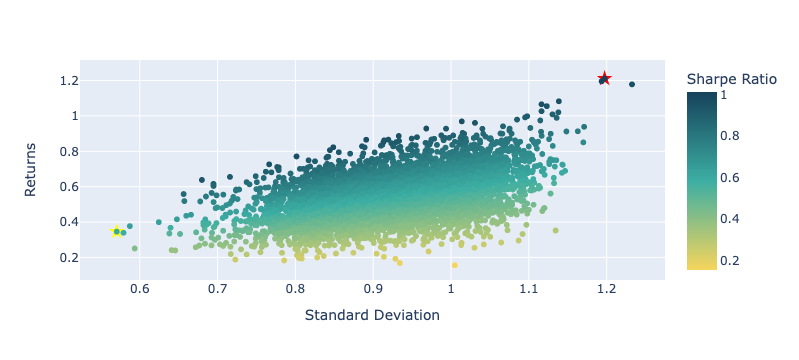

In [132]:
# Create scatter plot for crypto.
print('Portfolio Returns Vs. Risk for crypto')
create_scatter_plot(crypto_processed_df)


Portfolio Returns Vs. Risk for stocks


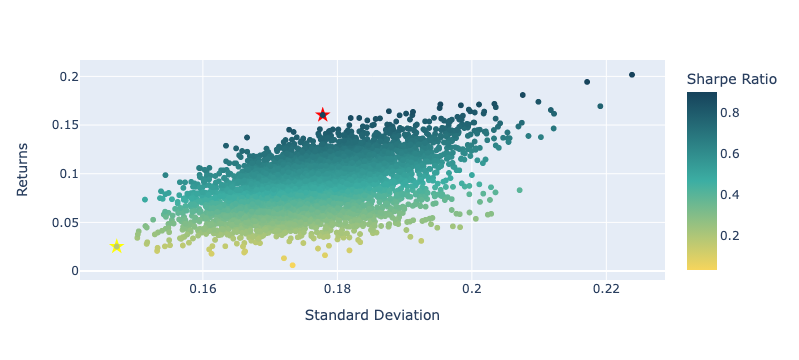

In [133]:
# Create scatter plot for stocks.
print('Portfolio Returns Vs. Risk for stocks')
create_scatter_plot(stocks_processed_df)


Portfolio Returns Vs. Risk for commodities


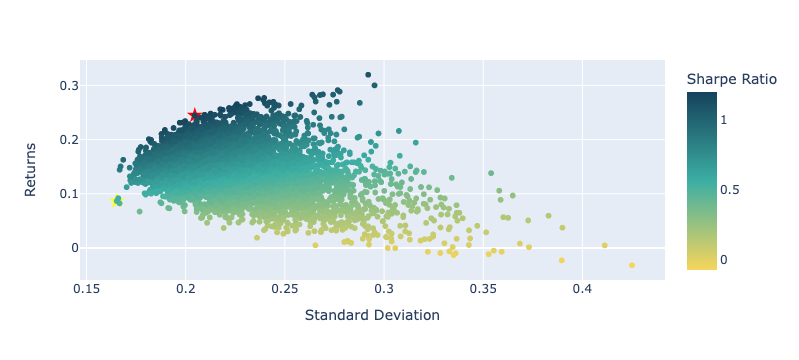

In [134]:
# Create scatter plot for commodities.
print('Portfolio Returns Vs. Risk for commodities')
create_scatter_plot(commodities_processed_df)


Portfolio Returns Vs. Risk for bonds


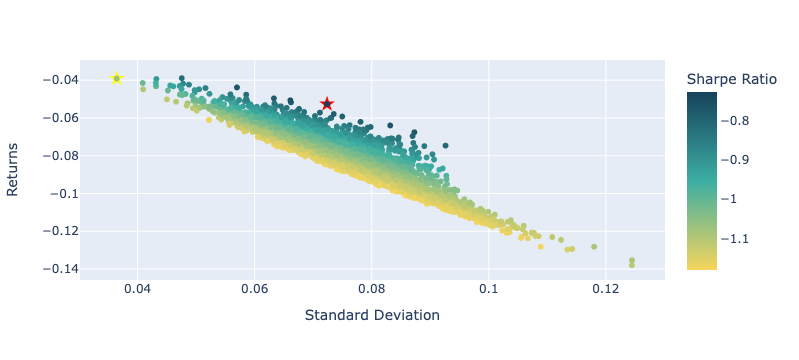

In [135]:
# Create scatter plot for bonds.
print('Portfolio Returns Vs. Risk for bonds')
create_scatter_plot(bonds_processed_df)

In [136]:
def create_portfolio_weights_df(selected_tickers, max_sharpe_ratio, min_volatility):
    """
    This function creates a DataFrame with the portfolio weights for the selected tickers for both the
    maximum Sharpe ratio and minimum volatility portfolios for a single asset class.
    
    Parameters:
    - selected_tickers (list): List of selected tickers for the asset class.
    - max_sharpe_ratio (Series): Series with the maximum Sharpe ratio portfolio weights for the asset class.
    - min_volatility (Series): Series with the minimum volatility portfolio weights for the asset class.
    
    Returns:
    - Tuple of two DataFrames: one for the maximum Sharpe ratio portfolio weights and another for the minimum volatility
    portfolio weights.
    """
    
    # Create a dictionary with the portfolio weights for each portfolio
    portfolio_weights_dict = {
        'Max Sharpe Ratio': max_sharpe_ratio,
        'Min Volatility': min_volatility
    }
    
    # Create empty dictionaries for the portfolio weights
    max_sharpe_ratio_weights = {}
    min_volatility_weights = {}
    
    # Iterate over each portfolio
    for portfolio_name, portfolio_weights in portfolio_weights_dict.items():
        
        # Create an empty dictionary to store the portfolio weights for each ticker
        ticker_weights = {}
        
        # Iterate over each ticker
        for i, ticker in enumerate(selected_tickers):
            
            # Get the weight for the ticker from the portfolio weights
            ticker_weight = portfolio_weights[i]
            
            # Add the ticker weight to the ticker_weights dictionary
            ticker_weights[ticker] = ticker_weight
        
        # Convert the ticker_weights dictionary to a Series and add it to the corresponding weights dictionary
        if portfolio_name == 'Max Sharpe Ratio':
            max_sharpe_ratio_weights = pd.Series(ticker_weights, name=portfolio_name)
        else:
            min_volatility_weights = pd.Series(ticker_weights, name=portfolio_name)
    
    # Create DataFrames from the weights dictionaries
    max_sharpe_ratio_weights_df = pd.DataFrame(max_sharpe_ratio_weights)
    min_volatility_weights_df = pd.DataFrame(min_volatility_weights)
    
    # # Add a column to the DataFrames for the total weight of the portfolio
    # max_sharpe_ratio_weights_df['Total Weight'] = max_sharpe_ratio_weights_df.sum(axis=1)
    # min_volatility_weights_df['Total Weight'] = min_volatility_weights_df.sum(axis=1)
    
    # # Add a column to the DataFrames for the weight of each ticker as a percentage of the total portfolio weight
    # max_sharpe_ratio_weights_df = max_sharpe_ratio_weights_df.apply(lambda x: x/max_sharpe_ratio_weights_df['Total Weight'])
    # min_volatility_weights_df = min_volatility_weights_df.apply(lambda x: x/min_volatility_weights_df['Total Weight'])
    
    return max_sharpe_ratio_weights_df, min_volatility_weights_df

In [137]:

# Create DataFrame with portfolio weights for each asset class
crypto_max_sharpe_ratio_weights, crypto_min_volatility_weights = create_portfolio_weights_df(crypto_selected_tickers, crypto_max_sharpe_ratio['Portfolio Weights'], crypto_min_volatility['Portfolio Weights'])
stocks_max_sharpe_ratio_weights, stocks_min_volatility_weights = create_portfolio_weights_df(stocks_selected_tickers, stocks_max_sharpe_ratio['Portfolio Weights'], stocks_min_volatility['Portfolio Weights'])
commodities_max_sharpe_ratio_weights, commodities_min_volatility_weights = create_portfolio_weights_df(commodities_selected_tickers, commodities_max_sharpe_ratio['Portfolio Weights'], commodities_min_volatility['Portfolio Weights'])
bonds_max_sharpe_ratio_weights, bonds_min_volatility_weights = create_portfolio_weights_df(bonds_selected_tickers, bonds_max_sharpe_ratio['Portfolio Weights'], bonds_min_volatility['Portfolio Weights'])

In [138]:
crypto_max_sharpe_ratio_weights

Max Sharpe Ratio
AAVE-USD           0.000661
ETH-USD            0.097536
MATIC-USD          0.454065
MKR-USD            0.051500
NEAR-USD           0.016379
PAXG-USD           0.000377
SOL-USD            0.379480

In [139]:
crypto_min_volatility_weights

Min Volatility
AAVE-USD         0.147720
ETH-USD          0.023551
MATIC-USD        0.106654
MKR-USD          0.102559
NEAR-USD         0.020891
PAXG-USD         0.490988
SOL-USD          0.107637

In [140]:
stocks_max_sharpe_ratio_weights

Max Sharpe Ratio
VB            0.045541
VOO           0.009290
VWO           0.011618
XLE           0.300427
XLF           0.108028
XLK           0.051720
XLU           0.182092
XLV           0.291283

In [141]:
stocks_min_volatility_weights

Min Volatility
VB          0.072584
VOO         0.000179
VWO         0.283468
XLE         0.023049
XLF         0.041091
XLK         0.048639
XLU         0.300890
XLV         0.230100

In [142]:
commodities_max_sharpe_ratio_weights

Max Sharpe Ratio
DBA           0.284070
JJG           0.335060
PPLT          0.003727
REMX          0.060818
UGA           0.315843
UNG           0.000481

In [143]:
commodities_min_volatility_weights

Min Volatility
DBA         0.475384
JJG         0.132647
PPLT        0.273839
REMX        0.015947
UGA         0.012418
UNG         0.089765

In [144]:
bonds_max_sharpe_ratio_weights

Max Sharpe Ratio
FLOT          0.235193
HYG           0.382393
PFF           0.335244
TIP           0.043228
TLT           0.003784
VWOB          0.000158

In [145]:
bonds_min_volatility_weights

Min Volatility
FLOT        0.664044
HYG         0.030432
PFF         0.034293
TIP         0.036268
TLT         0.065570
VWOB        0.169394

### Step 9: Calculate optimal asset class allocations
In this step, you calculate the optimal asset class allocations for both maximum Sharpe ratio and minimum volatility portfolios. You assign the calculated weights to each asset class and create DataFrames for each portfolio type.

Next, you concatenate the DataFrames of the four asset classes for the maximum Sharpe ratio and minimum volatility portfolios, and fill any NaN values using the forward-fill method.

You then perform Monte Carlo simulations for both portfolio types, and create DataFrames for the simulation results.

After calling the process_simulations_df() function for both portfolios, you create scatter plots to visualize the relationship between portfolio returns and risk for both maximum Sharpe ratio and minimum volatility portfolios.

Finally, you create DataFrames with portfolio weights for each asset class and display the weights for each portfolio type.

In [184]:
#Assigns the maximum Sharpe ratio weights for all assets
crypto_max_weights = crypto_max_sharpe_ratio.loc['Portfolio Weights']
stocks_max_weights = stocks_max_sharpe_ratio.loc['Portfolio Weights']
commodities_max_weights = commodities_max_sharpe_ratio.loc['Portfolio Weights']
bonds_max_weights = bonds_max_sharpe_ratio.loc['Portfolio Weights']


In [185]:
#Assigns the Min volatility weights for all assets
crypto_min_vol_weights = crypto_min_volatility.loc['Portfolio Weights']
stocks_min_vol_weights = stocks_min_volatility.loc['Portfolio Weights']
commodities_min_vol_weights = commodities_min_volatility.loc['Portfolio Weights']
bonds_min_vol_weights = bonds_min_volatility.loc['Portfolio Weights']


In [186]:
print(crypto_max_weights)
print(stocks_max_weights)
print(commodities_max_weights)
print(bonds_max_weights)

[6.61070319e-04 9.75361383e-02 4.54065288e-01 5.15004932e-02
 1.63792144e-02 3.77340051e-04 3.79480456e-01]
[0.04554121 0.00928988 0.01161792 0.30042748 0.10802847 0.05171976
 0.18209234 0.29128294]
[0.28407017 0.33506026 0.00372731 0.06081813 0.31584328 0.00048085]
[2.35193479e-01 3.82392865e-01 3.35243565e-01 4.32277786e-02
 3.78389503e-03 1.58417728e-04]


In [187]:
print(crypto_min_vol_weights)
print(stocks_min_vol_weights)
print(commodities_min_vol_weights)
print(bonds_min_vol_weights)

[0.14772033 0.02355127 0.1066538  0.10255862 0.02089084 0.49098848
 0.10763665]
[7.25836863e-02 1.79267214e-04 2.83468251e-01 2.30488797e-02
 4.10911137e-02 4.86388085e-02 3.00889711e-01 2.30100282e-01]
[0.4753836  0.13264728 0.27383912 0.01594694 0.01241816 0.0897649 ]
[0.66404435 0.03043182 0.0342927  0.03626759 0.06557001 0.16939354]


In [188]:
# Assign weights to asset classes for max sharpe ratio portfolio 
crypto_max_comb_df = crypto_results @ crypto_max_weights
stocks_max_comb_df = stocks_results @ stocks_max_weights
commodities_max_comb_df = commodities_results @ commodities_max_weights
bonds_max_comb_df = bonds_results @ bonds_max_weights


In [189]:
# Assign weights to asset classes for min volatility portfolio
crypto_min_comb_df = crypto_results @ crypto_min_vol_weights
stocks_min_comb_df = stocks_results @ stocks_min_vol_weights
commodities_min_comb_df = commodities_results @ commodities_min_vol_weights
bonds_min_comb_df = bonds_results @ bonds_min_vol_weights

In [190]:
display(crypto_max_comb_df.head())
display(stocks_max_comb_df.head())
display(commodities_max_comb_df.head())
display(bonds_max_comb_df.head())

Date
2020-10-15   -0.011098
2020-10-16   -0.054879
2020-10-17    0.024187
2020-10-18    0.011233
2020-10-19   -0.047660
dtype: float64

Date
2020-10-15    0.002176
2020-10-16   -0.002216
2020-10-19   -0.015965
2020-10-20    0.006392
2020-10-21   -0.008730
dtype: float64

Date
2020-10-15    0.003541
2020-10-16   -0.008463
2020-10-19    0.000019
2020-10-20    0.011859
2020-10-21   -0.007830
dtype: float64

Date
2020-10-15   -0.000294
2020-10-16   -0.001581
2020-10-19   -0.003075
2020-10-20    0.003430
2020-10-21   -0.002676
dtype: float64

In [191]:
display(crypto_min_comb_df.head())
display(stocks_min_comb_df.head())
display(commodities_min_comb_df.head())
display(bonds_min_comb_df.head())

Date
2020-10-15   -0.026363
2020-10-16   -0.038322
2020-10-17    0.012734
2020-10-18    0.005335
2020-10-19   -0.031537
dtype: float64

Date
2020-10-15   -0.003290
2020-10-16    0.005791
2020-10-19   -0.010003
2020-10-20    0.006001
2020-10-21   -0.002705
dtype: float64

Date
2020-10-15    0.008643
2020-10-16   -0.004290
2020-10-19    0.001185
2020-10-20    0.006760
2020-10-21    0.007423
dtype: float64

Date
2020-10-15   -0.001101
2020-10-16   -0.000066
2020-10-19   -0.001458
2020-10-20   -0.000077
2020-10-21   -0.001088
dtype: float64

In [192]:
# Concatenate the four asset classes dataframes for the maximum Sharpe ratio portfolio
max_comb_df = pd.concat([crypto_max_comb_df, stocks_max_comb_df, commodities_max_comb_df, bonds_max_comb_df], axis=1)

# Add prefixes to the column names to signify the corresponding asset class
max_comb_df.columns = ['Crypto', 'Stocks', 'Commodities', 'Bonds']

# Concatenate the four asset class dataframes for the minimum volatility portfolio
min_comb_df = pd.concat([crypto_min_comb_df, stocks_min_comb_df, commodities_min_comb_df, bonds_min_comb_df], axis=1)

# Add prefixes to the column names to signify the corresponding asset class
min_comb_df.columns = ['Crypto', 'Stocks', 'Commodities', 'Bonds']

In [193]:
max_comb_df.head()

Crypto    Stocks  Commodities     Bonds
Date                                                 
2020-10-15 -0.011098  0.002176     0.003541 -0.000294
2020-10-16 -0.054879 -0.002216    -0.008463 -0.001581
2020-10-17  0.024187       NaN          NaN       NaN
2020-10-18  0.011233       NaN          NaN       NaN
2020-10-19 -0.047660 -0.015965     0.000019 -0.003075

In [194]:
min_comb_df.head()

Crypto    Stocks  Commodities     Bonds
Date                                                 
2020-10-15 -0.026363 -0.003290     0.008643 -0.001101
2020-10-16 -0.038322  0.005791    -0.004290 -0.000066
2020-10-17  0.012734       NaN          NaN       NaN
2020-10-18  0.005335       NaN          NaN       NaN
2020-10-19 -0.031537 -0.010003     0.001185 -0.001458

In [195]:
# Fill NaN values in a DataFrame using forward-fill method.
max_comb_df = max_comb_df.fillna(method='ffill')
min_comb_df = min_comb_df.fillna(method='ffill')

In [196]:
max_comb_df.head() 

Crypto    Stocks  Commodities     Bonds
Date                                                 
2020-10-15 -0.011098  0.002176     0.003541 -0.000294
2020-10-16 -0.054879 -0.002216    -0.008463 -0.001581
2020-10-17  0.024187 -0.002216    -0.008463 -0.001581
2020-10-18  0.011233 -0.002216    -0.008463 -0.001581
2020-10-19 -0.047660 -0.015965     0.000019 -0.003075

In [197]:
min_comb_df.head()

Crypto    Stocks  Commodities     Bonds
Date                                                 
2020-10-15 -0.026363 -0.003290     0.008643 -0.001101
2020-10-16 -0.038322  0.005791    -0.004290 -0.000066
2020-10-17  0.012734  0.005791    -0.004290 -0.000066
2020-10-18  0.005335  0.005791    -0.004290 -0.000066
2020-10-19 -0.031537 -0.010003     0.001185 -0.001458

In [198]:
# Define the number of selected asset classes as number of columns 
max_comb_num_selected_tickers = max_comb_df.shape[1]
min_comb_num_selected_tickers = min_comb_df.shape[1]

# Define the df that will be passed to MC simulation
max_comb_results = max_comb_df
min_comb_results = min_comb_df

# Perform Monte Carlo simulation for maximum Sharpe ratio portfolio
max_comb_all_weights, max_comb_ret_arr, max_comb_vol_arr, max_comb_sharpe_ratio_arr = monte_carlo_simulation(num_of_portfolios, max_comb_num_selected_tickers, max_comb_results)

# Perform Monte Carlo simulation for minimum volatility portfolio
min_comb_all_weights, min_comb_ret_arr, min_comb_vol_arr, min_comb_sharpe_ratio_arr = monte_carlo_simulation(num_of_portfolios, min_comb_num_selected_tickers, min_comb_results)

In [199]:
# Create data frame with the weights, the returns, the volatility, and the Sharpe Ratio arrays
# for minimum volatility and maximun sharpe ratio portfoilos for asset classes
max_comb_sim_data = [max_comb_ret_arr, max_comb_vol_arr, max_comb_sharpe_ratio_arr, max_comb_all_weights]
min_comb_sim_data = [min_comb_ret_arr, min_comb_vol_arr, min_comb_sharpe_ratio_arr, min_comb_all_weights]

In [200]:
# Create a DataFrame from sim data and Transpose, so it will look like our original one.
max_comb_simulations_df = pd.DataFrame(data=max_comb_sim_data).T
min_comb_simulations_df = pd.DataFrame(data=min_comb_sim_data).T


In [201]:
#Call the process_simulations_df() function for minimum volatility and maximun sharpe ratio portfoilos for asset classes
max_comb_max_sharpe_ratio, max_comb_min_volatility, max_comb_processed_df = process_simulations_df(max_comb_simulations_df)
min_comb_max_sharpe_ratio, min_comb_min_volatility, min_comb_processed_df = process_simulations_df(min_comb_simulations_df)


In [202]:
display(max_comb_processed_df.head())
max_comb_processed_df.tail()


Returns  Volatility  Sharpe Ratio                                                                     Portfolio Weights
0  0.567547    0.469331      1.209269    [0.36469452996773044, 0.3085535047697226, 0.13863570317071963, 0.1881162620918275]
1  0.286672    0.191652      1.495798   [0.09950805677316094, 0.3159107907247042, 0.25141812285758003, 0.33316302964455485]
2  0.469854    0.350683      1.339823    [0.2523937850849809, 0.40688586385190334, 0.1667956211616746, 0.17392472990144137]
3  0.650842    0.473065      1.375799   [0.3613398037589348, 0.34956040367398383, 0.285660948174968, 0.0034388443921134393]
4  0.587111    0.421826      1.391833  [0.32246018094420903, 0.12184364230597759, 0.40580235661333125, 0.14989382013648214]

Returns  Volatility  Sharpe Ratio                                                                    Portfolio Weights
4995  0.289860    0.263034      1.101986   [0.1800406570790289, 0.33489111494753626, 0.0406927322597852, 0.44437549571364965]
4996  0.607877    0.466309      1.303593    [0.36502369793696454, 0.10408546107894824, 0.3502563629231132, 0.180634478060974]
4997  0.505392    0.371409      1.360741     [0.2757078525419482, 0.2791131467810297, 0.26077236090950806, 0.184406639767514]
4998  0.209365    0.146500      1.429116  [0.04648873651900256, 0.2770655899046318, 0.25818060992245506, 0.41826506365391064]
4999  0.554990    0.400306      1.386414  [0.2991317680306628, 0.30651686735960265, 0.28175253188953125, 0.11259883272020312]

Portfolio Returns Vs. Risk for maximun sharpe ratio portfoilo


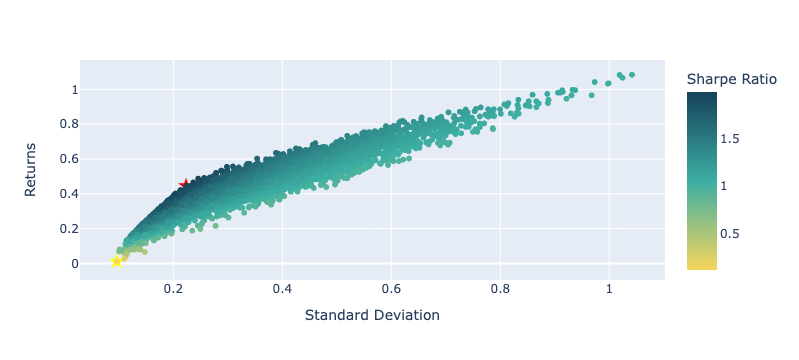

In [203]:
# Create scatter plot for maximun sharpe ratio portfoilo
print('Portfolio Returns Vs. Risk for maximun sharpe ratio portfoilo')
create_scatter_plot(max_comb_processed_df)

In [204]:
# Review portfolio of maximun sharpe ratio for asset classes with highest Sharpe ratio
max_comb_max_sharpe_ratio

Returns                                                                                         0.445183
Volatility                                                                                        0.2234
Sharpe Ratio                                                                                    1.992761
Portfolio Weights    [0.07706003747677444, 0.1775516580850711, 0.7123081849385713, 0.033080119499583074]
dtype: object

In [205]:
# Review portfolio of minimum volatility for asset classes with highest Sharpe ratio (probably not needed)
max_comb_min_volatility

Returns                                                                                         0.011106
Volatility                                                                                      0.096177
Sharpe Ratio                                                                                    0.115472
Portfolio Weights    [0.01880517946671244, 0.09283940981352336, 0.055058277523557304, 0.833297133196207]
dtype: object

In [206]:
display(min_comb_processed_df.head())
min_comb_processed_df.tail()

Returns  Volatility  Sharpe Ratio                                                                     Portfolio Weights
0  0.125896    0.240293      0.523929    [0.3674810317415182, 0.02399989795800304, 0.4066752096696162, 0.20184386063086268]
1  0.069161    0.157618      0.438789      [0.2091414152819524, 0.2007054066474184, 0.2248774014643537, 0.3652757766062755]
2  0.163776    0.269258      0.608252     [0.4011349966470461, 0.3682621019206306, 0.1869977384123929, 0.04360516301993049]
3  0.063475    0.159466      0.398050   [0.04917098910756517, 0.8101128717986565, 0.03520539056639256, 0.10551074852738553]
4  0.157850    0.257285      0.613524  [0.35626804610251483, 0.5663568205392873, 0.037110948953803236, 0.04026418440439454]

Returns  Volatility  Sharpe Ratio                                                                     Portfolio Weights
4995  0.098869    0.186562      0.529952    [0.23913726964472745, 0.4083409711935491, 0.12988147996913657, 0.2226402791925869]
4996  0.132269    0.227990      0.580152  [0.3100109296246495, 0.29374906767128883, 0.36734427326101743, 0.028895729443044266]
4997  0.112028    0.210329      0.532630    [0.30725989506905743, 0.3130459458970078, 0.0948783916124691, 0.28481576742146575]
4998  0.068381    0.160279      0.426635  [0.21096951812781398, 0.12457228015059015, 0.32247999912335845, 0.34197820259823747]
4999  0.118472    0.217792      0.543969     [0.320322030763505, 0.2434437413285262, 0.21672829816753822, 0.21950592974043062]

Portfolio Returns Vs. Risk for minimum volatility portfoilo


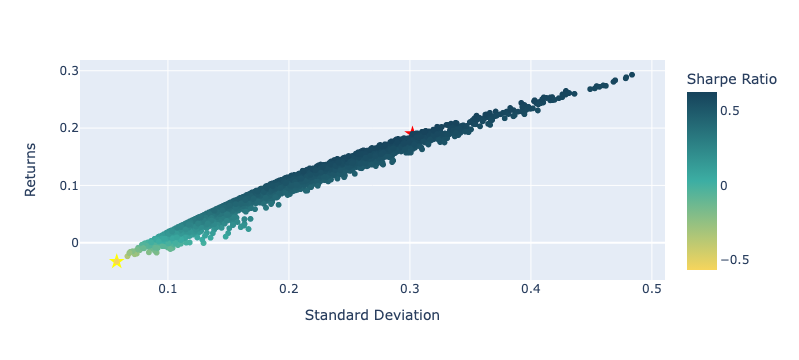

In [207]:
# Create scatter plot for maximun sharpe ratio portfoilo
print('Portfolio Returns Vs. Risk for minimum volatility portfoilo')
create_scatter_plot(min_comb_processed_df)

In [208]:
# Review portfolio of minimum volatility for asset classes with highest Sharpe ratio 
min_comb_max_sharpe_ratio

Returns                                                                                           0.189809
Volatility                                                                                        0.302105
Sharpe Ratio                                                                                      0.628289
Portfolio Weights    [0.4493787277368464, 0.5383507080100646, 0.009693240711848449, 0.0025773235412406416]
dtype: object

In [209]:
# Review portfolio of minimum volatility for asset classes with lowest volatility (probably not needed)
min_comb_min_volatility

Returns                                                                                        -0.032705
Volatility                                                                                      0.057688
Sharpe Ratio                                                                                   -0.566927
Portfolio Weights    [0.020579109142032394, 0.009806061835454051, 0.1890083007417184, 0.780606528280795]
dtype: object

In [210]:
# Define list of asset classes for allocation 
max_comb_selected_tickers = max_comb_df.columns.tolist()
min_comb_selected_tickers = min_comb_df.columns.tolist()



In [211]:
max_comb_selected_tickers

['Crypto', 'Stocks', 'Commodities', 'Bonds']

In [212]:
min_comb_selected_tickers

['Crypto', 'Stocks', 'Commodities', 'Bonds']

In [213]:
# Create DataFrame with portfolio weights for each asset class
max_comb_sharpe_ratio_weights, max_comb_min_volatility_weights = create_portfolio_weights_df(max_comb_selected_tickers, max_comb_max_sharpe_ratio['Portfolio Weights'], max_comb_min_volatility['Portfolio Weights'])
min_comb_sharpe_ratio_weights, min_comb_min_volatility_weights = create_portfolio_weights_df(min_comb_selected_tickers, min_comb_max_sharpe_ratio['Portfolio Weights'], min_comb_min_volatility['Portfolio Weights'])


In [214]:
# Review df with weights for asset classes of max Sharpe ratio portfolio with highest Sharpe ratio
max_comb_sharpe_ratio_weights.T

Crypto    Stocks  Commodities    Bonds
Max Sharpe Ratio  0.07706  0.177552     0.712308  0.03308

In [215]:
# Review df with weights for asset classes of max Sharpe ratio portfolio with lowest volatility (probably not needed)
max_comb_min_volatility_weights.T


Crypto    Stocks  Commodities     Bonds
Min Volatility  0.018805  0.092839     0.055058  0.833297

In [216]:
# Review df with weights for asset classes of minimum volatility with highest Sharpe ratio
min_comb_sharpe_ratio_weights.T

Crypto    Stocks  Commodities     Bonds
Max Sharpe Ratio  0.449379  0.538351     0.009693  0.002577

In [217]:
# Review df with weights for asset classes of max minimum volatility portfolio with lowest volatility (probably not needed)
min_comb_min_volatility_weights.T

Crypto    Stocks  Commodities     Bonds
Min Volatility  0.020579  0.009806     0.189008  0.780607

### Step 10: Display final allocations
In this step, you create dictionaries for the maximum Sharpe ratio and minimum volatility portfolios containing the asset class weights and the corresponding individual asset weights for each asset class.

You then define a function, calculate_final_allocation, which calculates the final allocation for each asset in the portfolio by multiplying the individual asset weight by the respective asset class weight.

Next, you create DataFrames for each asset class in both the maximum Sharpe ratio and minimum volatility portfolios and format the allocation values, renaming the columns and converting the values to percentages.

You display these formatted DataFrames as HTML tables, arranged side by side for each portfolio type.

Finally, you create pie charts for each asset class in both the maximum Sharpe ratio and minimum volatility portfolios, visualizing the allocations for each asset within each asset class.

In [264]:
max_sharpe_portfolio = {
    "asset_class_weights": max_comb_sharpe_ratio_weights.T,
    "asset_classes": {
        "crypto": crypto_max_sharpe_ratio_weights,
        "stocks": stocks_max_sharpe_ratio_weights,
        "commodities": commodities_max_sharpe_ratio_weights,
        "bonds": bonds_max_sharpe_ratio_weights
    }
}

In [265]:
min_volatility_portfolio = {
    "asset_class_weights": min_comb_sharpe_ratio_weights.T,
    "asset_classes" : {
            'crypto': crypto_min_volatility_weights,
            'stocks': stocks_min_volatility_weights,
            'commodities': commodities_min_volatility_weights,
            'bonds': bonds_min_volatility_weights
    }
}

In [266]:
max_sharpe_portfolio

{'asset_class_weights':                    Crypto    Stocks  Commodities    Bonds
 Max Sharpe Ratio  0.07706  0.177552     0.712308  0.03308,
 'asset_classes': {'crypto':            Max Sharpe Ratio
  AAVE-USD           0.000661
  ETH-USD            0.097536
  MATIC-USD          0.454065
  MKR-USD            0.051500
  NEAR-USD           0.016379
  PAXG-USD           0.000377
  SOL-USD            0.379480,
  'stocks':       Max Sharpe Ratio
  VB            0.045541
  VOO           0.009290
  VWO           0.011618
  XLE           0.300427
  XLF           0.108028
  XLK           0.051720
  XLU           0.182092
  XLV           0.291283,
  'commodities':       Max Sharpe Ratio
  DBA           0.284070
  JJG           0.335060
  PPLT          0.003727
  REMX          0.060818
  UGA           0.315843
  UNG           0.000481,
  'bonds':       Max Sharpe Ratio
  FLOT          0.235193
  HYG           0.382393
  PFF           0.335244
  TIP           0.043228
  TLT           0.003784
  VW

In [267]:
min_volatility_portfolio

{'asset_class_weights':                     Crypto    Stocks  Commodities     Bonds
 Max Sharpe Ratio  0.449379  0.538351     0.009693  0.002577,
 'asset_classes': {'crypto':            Min Volatility
  AAVE-USD         0.147720
  ETH-USD          0.023551
  MATIC-USD        0.106654
  MKR-USD          0.102559
  NEAR-USD         0.020891
  PAXG-USD         0.490988
  SOL-USD          0.107637,
  'stocks':       Min Volatility
  VB          0.072584
  VOO         0.000179
  VWO         0.283468
  XLE         0.023049
  XLF         0.041091
  XLK         0.048639
  XLU         0.300890
  XLV         0.230100,
  'commodities':       Min Volatility
  DBA         0.475384
  JJG         0.132647
  PPLT        0.273839
  REMX        0.015947
  UGA         0.012418
  UNG         0.089765,
  'bonds':       Min Volatility
  FLOT        0.664044
  HYG         0.030432
  PFF         0.034293
  TIP         0.036268
  TLT         0.065570
  VWOB        0.169394}}

In [268]:
def calculate_final_allocation(portfolio):
    final_allocation = {}
    asset_class_weights = portfolio["asset_class_weights"]
    
    for asset_class, ticker_weights in portfolio["asset_classes"].items():
        # Match the asset class key with the corresponding column name
        asset_class_column = asset_class.title()
        
        # Calculate the final allocation for each ticker by multiplying the ticker weight
        # with the respective asset class weight
        asset_class_weight = asset_class_weights.loc[:, asset_class_column].values[0]
        final_ticker_weights = ticker_weights.multiply(asset_class_weight, axis=0)
        # Add the final ticker weights to the final_allocation dictionary
        final_allocation[asset_class] = final_ticker_weights

    return final_allocation

In [269]:
max_sharpe_final_allocation = calculate_final_allocation(max_sharpe_portfolio)
min_volatility_final_allocation = calculate_final_allocation(min_volatility_portfolio)

In [270]:
max_sharpe_final_allocation

{'crypto':            Max Sharpe Ratio
 AAVE-USD           0.000051
 ETH-USD            0.007516
 MATIC-USD          0.034990
 MKR-USD            0.003969
 NEAR-USD           0.001262
 PAXG-USD           0.000029
 SOL-USD            0.029243,
 'stocks':       Max Sharpe Ratio
 VB            0.008086
 VOO           0.001649
 VWO           0.002063
 XLE           0.053341
 XLF           0.019181
 XLK           0.009183
 XLU           0.032331
 XLV           0.051718,
 'commodities':       Max Sharpe Ratio
 DBA           0.202346
 JJG           0.238666
 PPLT          0.002655
 REMX          0.043321
 UGA           0.224978
 UNG           0.000343,
 'bonds':       Max Sharpe Ratio
 FLOT          0.007780
 HYG           0.012650
 PFF           0.011090
 TIP           0.001430
 TLT           0.000125
 VWOB          0.000005}

In [271]:
min_volatility_final_allocation

{'crypto':            Min Volatility
 AAVE-USD         0.066382
 ETH-USD          0.010583
 MATIC-USD        0.047928
 MKR-USD          0.046088
 NEAR-USD         0.009388
 PAXG-USD         0.220640
 SOL-USD          0.048370,
 'stocks':       Min Volatility
 VB          0.039075
 VOO         0.000097
 VWO         0.152605
 XLE         0.012408
 XLF         0.022121
 XLK         0.026185
 XLU         0.161984
 XLV         0.123875,
 'commodities':       Min Volatility
 DBA         0.004608
 JJG         0.001286
 PPLT        0.002654
 REMX        0.000155
 UGA         0.000120
 UNG         0.000870,
 'bonds':       Min Volatility
 FLOT        0.001711
 HYG         0.000078
 PFF         0.000088
 TIP         0.000093
 TLT         0.000169
 VWOB        0.000437}

In [272]:
# Maximum Sharpe Ratio portfolio DataFrames.
max_sharpe_crypto_df = max_sharpe_final_allocation['crypto']
max_sharpe_stocks_df = max_sharpe_final_allocation['stocks']
max_sharpe_commodities_df = max_sharpe_final_allocation['commodities']
max_sharpe_bonds_df = max_sharpe_final_allocation['bonds']

# Minimum Volatility portfolio DataFrames
min_volatility_crypto_df = min_volatility_final_allocation['crypto']
min_volatility_stocks_df = min_volatility_final_allocation['stocks']
min_volatility_commodities_df = min_volatility_final_allocation['commodities']
min_volatility_bonds_df = min_volatility_final_allocation['bonds']


In [273]:
max_sharpe_crypto_df.head()

Max Sharpe Ratio
AAVE-USD           0.000051
ETH-USD            0.007516
MATIC-USD          0.034990
MKR-USD            0.003969
NEAR-USD           0.001262

In [274]:
def format_allocation(df, old_column, new_column):
    """
    This function formats the allocation values in a given DataFrame by renaming the specified column, converting
    the values to percentages, and rounding them to 4 decimal places.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame containing the allocation values.
    old_column (str): The name of the column in the input DataFrame to be renamed.
    new_column (str): The new name for the column after renaming.
    
    Returns:
    pd.DataFrame: A new DataFrame with the specified column renamed and the allocation values formatted as percentages.
    """
    
    # Create a copy of the input DataFrame to avoid modifying the original data
    formatted_df = df.copy()
    
    # Rename the specified column
    formatted_df = formatted_df.rename(columns={old_column: new_column})
    
    # Convert the values in the renamed column to percentages and round them to 4 decimal places
    formatted_df[new_column] = formatted_df[new_column].apply(lambda x: f'{x * 100:1.4f}%')
    
    # Return the formatted DataFrame
    return formatted_df

In [275]:
# Format the allocation values for each asset class by renaming the 'Max Sharpe Ratio'
# column and converting the allocation values to percentages
max_sharpe_crypto_form_df = format_allocation(
    max_sharpe_final_allocation['crypto'].copy(),
    'Max Sharpe Ratio',
    'Portfolio Allocation'
)

max_sharpe_stocks_form_df = format_allocation(
    max_sharpe_final_allocation['stocks'].copy(),
    'Max Sharpe Ratio',
    'Portfolio Allocation'
)

max_sharpe_commodities_form_df = format_allocation(
    max_sharpe_final_allocation['commodities'].copy(),
    'Max Sharpe Ratio',
    'Portfolio Allocation'
)

max_sharpe_bonds_form_df = format_allocation(
    max_sharpe_final_allocation['bonds'].copy(),
    'Max Sharpe Ratio',
    'Portfolio Allocation'
)

In [276]:
max_sharpe_crypto_form_df

Portfolio Allocation
AAVE-USD               0.0051%
ETH-USD                0.7516%
MATIC-USD              3.4990%
MKR-USD                0.3969%
NEAR-USD               0.1262%
PAXG-USD               0.0029%
SOL-USD                2.9243%

In [277]:
# Create an HTML table to arrange the DataFrames side by side
table = "<table><tr><td>{0}</td><td>{1}</td><td>{2}</td><td>{3}</td></tr></table>".format(
    max_sharpe_crypto_form_df.to_html(),
    max_sharpe_stocks_form_df.to_html(),
    max_sharpe_commodities_form_df.to_html(),
    max_sharpe_bonds_form_df.to_html()
)

# Display the HTML table with the DataFrames
display(HTML(table))

In [278]:
def create_pie_chart(df, title):
    fig = go.Figure()

    fig.add_trace(go.Pie(
        labels=df.index,
        values=df.iloc[:, 0],
        hole=0.7,
        marker=dict(colors=['red', 'blue', 'green', 'yellow', 'purple', 'orange', 'pink', 'brown', 'magenta', 'cyan'])
    ))

    fig.update_layout(
        title_text=title,
        font=dict(
            family="Arial",
            size=12,
            color="black"
        ),
        showlegend=True
    )

    fig.show()

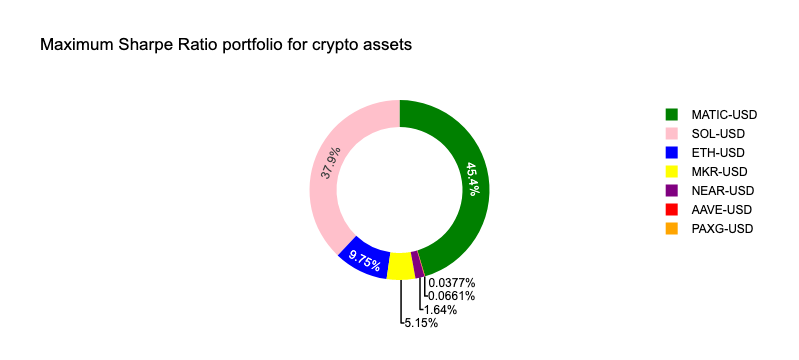

In [279]:
create_pie_chart(max_sharpe_crypto_df, 'Maximum Sharpe Ratio portfolio for crypto assets')

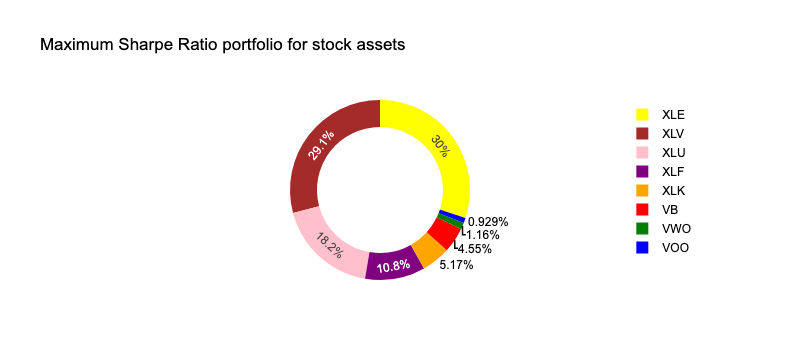

In [280]:
create_pie_chart(max_sharpe_stocks_df, 'Maximum Sharpe Ratio portfolio for stock assets')

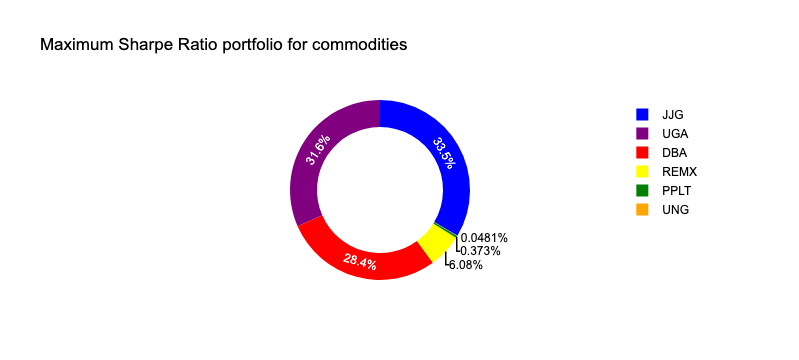

In [281]:
create_pie_chart(max_sharpe_commodities_df, 'Maximum Sharpe Ratio portfolio for commodities')

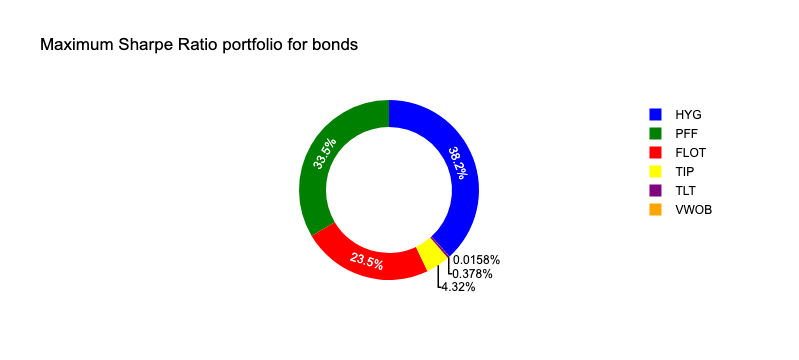

In [282]:
create_pie_chart(max_sharpe_bonds_df, 'Maximum Sharpe Ratio portfolio for bonds')

In [283]:
# Format the allocation values for each asset class in the Minimum Volatility portfolio by renaming the 'Min Volatility'
# column and converting the allocation values to percentages
min_volatility_crypto_form_df = format_allocation(
    min_volatility_final_allocation['crypto'].copy(),
    'Min Volatility',
    'Portfolio Allocation'
)

min_volatility_stocks_form_df = format_allocation(
    min_volatility_final_allocation['stocks'].copy(),
    'Min Volatility',
    'Portfolio Allocation'
)

min_volatility_commodities_form_df = format_allocation(
    min_volatility_final_allocation['commodities'].copy(),
    'Min Volatility',
    'Portfolio Allocation'
)

min_volatility_bonds_form_df = format_allocation(
    min_volatility_final_allocation['bonds'].copy(),
    'Min Volatility',
    'Portfolio Allocation'
)

In [284]:

# Create an HTML table to arrange the DataFrames side by side
table = "<table><tr><td>{0}</td><td>{1}</td><td>{2}</td><td>{3}</td></tr></table>".format(
    min_volatility_crypto_form_df.to_html(),
    min_volatility_stocks_form_df.to_html(),
    min_volatility_commodities_form_df.to_html(),
    min_volatility_bonds_form_df.to_html()
)


print("Minimum Volatility Portfolio Allocations:")
display(HTML(table))


Minimum Volatility Portfolio Allocations:


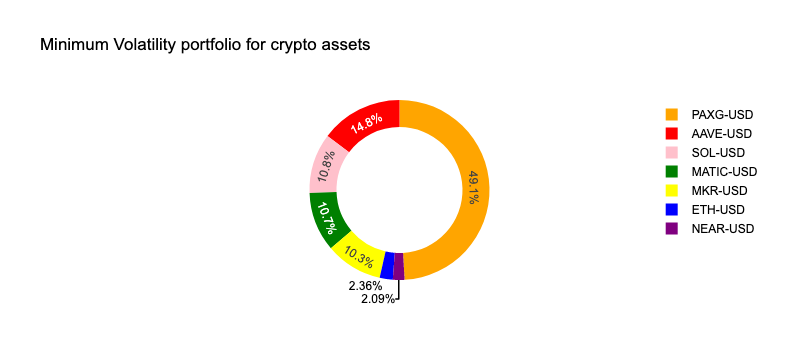

In [285]:
create_pie_chart(min_volatility_crypto_df, 'Minimum Volatility portfolio for crypto assets')

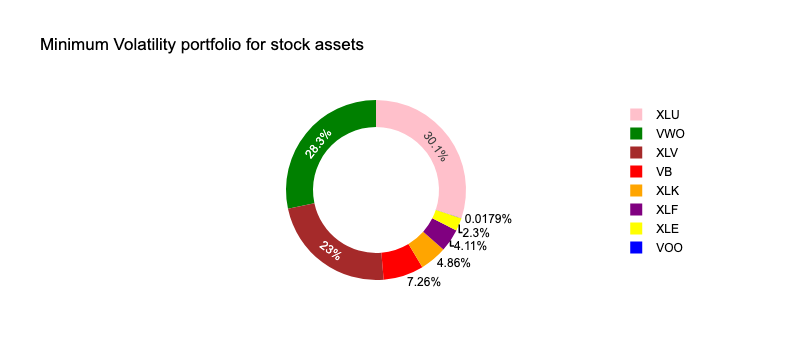

In [286]:
create_pie_chart(min_volatility_stocks_df, 'Minimum Volatility portfolio for stock assets')

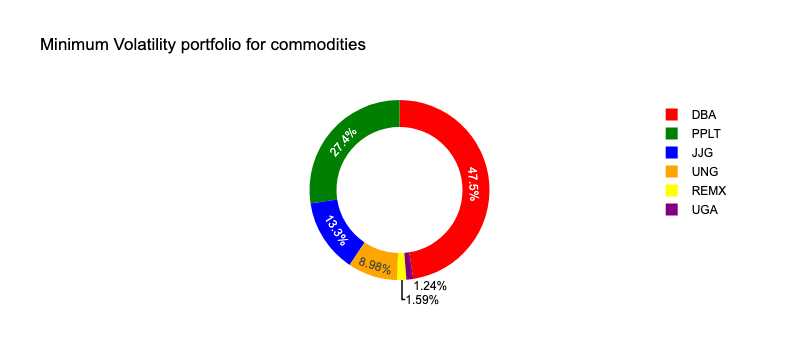

In [287]:
create_pie_chart(min_volatility_commodities_df, 'Minimum Volatility portfolio for commodities')

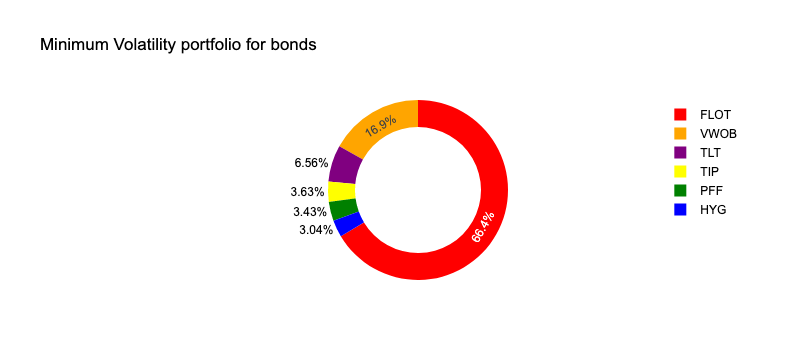

In [288]:
create_pie_chart(min_volatility_bonds_df, 'Minimum Volatility portfolio for bonds')

In [289]:

# Display the  DataFrames
print("Maximum Sharpe Ratio Portfolio - Crypto Allocations:")
max_sharpe_crypto_df


Maximum Sharpe Ratio Portfolio - Crypto Allocations:


Max Sharpe Ratio
AAVE-USD           0.000051
ETH-USD            0.007516
MATIC-USD          0.034990
MKR-USD            0.003969
NEAR-USD           0.001262
PAXG-USD           0.000029
SOL-USD            0.029243

In [290]:
print("Maximum Sharpe Ratio Portfolio - Stocks Allocations:")
max_sharpe_stocks_df

Maximum Sharpe Ratio Portfolio - Stocks Allocations:


Max Sharpe Ratio
VB            0.008086
VOO           0.001649
VWO           0.002063
XLE           0.053341
XLF           0.019181
XLK           0.009183
XLU           0.032331
XLV           0.051718

In [291]:

print("Maximum Sharpe Ratio Portfolio - Commodities Allocations:")
max_sharpe_commodities_df


Maximum Sharpe Ratio Portfolio - Commodities Allocations:


Max Sharpe Ratio
DBA           0.202346
JJG           0.238666
PPLT          0.002655
REMX          0.043321
UGA           0.224978
UNG           0.000343

In [292]:
 
print("Maximum Sharpe Ratio Portfolio - Bonds Allocations:")
max_sharpe_bonds_df



Maximum Sharpe Ratio Portfolio - Bonds Allocations:


Max Sharpe Ratio
FLOT          0.007780
HYG           0.012650
PFF           0.011090
TIP           0.001430
TLT           0.000125
VWOB          0.000005

In [293]:
print("Minimum Volatility Portfolio - Crypto Allocations:")
min_volatility_crypto_df


Minimum Volatility Portfolio - Crypto Allocations:


Min Volatility
AAVE-USD         0.066382
ETH-USD          0.010583
MATIC-USD        0.047928
MKR-USD          0.046088
NEAR-USD         0.009388
PAXG-USD         0.220640
SOL-USD          0.048370

In [294]:
print("Minimum Volatility Portfolio - Stocks Allocations:")
min_volatility_stocks_df



Minimum Volatility Portfolio - Stocks Allocations:


Min Volatility
VB          0.039075
VOO         0.000097
VWO         0.152605
XLE         0.012408
XLF         0.022121
XLK         0.026185
XLU         0.161984
XLV         0.123875

In [295]:

print("Minimum Volatility Portfolio - Commodities Allocations:")
min_volatility_commodities_df




Minimum Volatility Portfolio - Commodities Allocations:


Min Volatility
DBA         0.004608
JJG         0.001286
PPLT        0.002654
REMX        0.000155
UGA         0.000120
UNG         0.000870

In [296]:
print("Minimum Volatility Portfolio - Bonds Allocations:")
min_volatility_bonds_df

Minimum Volatility Portfolio - Bonds Allocations:


Min Volatility
FLOT        0.001711
HYG         0.000078
PFF         0.000088
TIP         0.000093
TLT         0.000169
VWOB        0.000437

### Step 11: Evaluate portfolio performance
In this step, you will evaluate the performance of the maximum Sharpe ratio and minimum volatility portfolios against a benchmark portfolio consisting of four asset classes with equal weightage.

First, you define the benchmark tickers for each asset class, download historical data for these tickers, and calculate their daily log returns.

Next, you define the weights for each asset class in the benchmark portfolio and calculate the weighted returns for each asset class. Then, you combine the weighted returns into a single benchmark portfolio return.

After that, you calculate the weighted returns for each asset class in both the maximum Sharpe ratio and minimum volatility portfolios.

You then define a function, calculate_total_weighted_returns, which calculates the total weighted returns for a given portfolio consisting of four asset classes.

You call this function for both the maximum Sharpe ratio and minimum volatility portfolios and convert the index of the returns to a DatetimeIndex.

Finally, you create performance tear sheets for each of the portfolios using the create_simple_tear_sheet function from the pyfolio library. This provides a comprehensive overview of the portfolio's performance, including various risk and return metrics, rolling beta, and rolling Sharpe ratio.


In [315]:
# Define benchmark tickers for each asset class
benchmark_tickers = {
    'crypto': 'BTC-USD',  # Bitcoin as a benchmark for cryptocurrencies
    'stocks': 'SPY',      # S&P 500 ETF (SPY) as a benchmark for stocks
    'commodities': 'GSG', # S&P GSCI Commodity Index ETF (GSG) as a benchmark for commodities
    'bonds': 'AGG'        # iShares Core U.S. Aggregate Bond ETF (AGG) as a benchmark for bonds
}

# Download historical data for benchmark tickers
benchmarks_data = yf.download(list(benchmark_tickers.values()), start=selected_start_date, end=selected_end_date)['Adj Close']

# Fill NaN values with the previous data point (forward fill)
benchmarks_data.fillna(method='ffill', inplace=True)


[*********************100%***********************]  4 of 4 completed


In [316]:
benchmarks_data.head(14)

AGG       BTC-USD    GSG         SPY
Date                                                   
2020-10-14  112.047600  11429.506836  11.03  335.158508
2020-10-15  111.952660  11495.349609  11.09  334.744293
2020-10-16  111.895691  11322.123047  11.03  334.541992
2020-10-17  111.895691  11358.101562  11.03  334.541992
2020-10-18  111.895691  11483.359375  11.03  334.541992
2020-10-19  111.762810  11742.037109  10.99  329.455780
2020-10-20  111.667923  11916.334961  11.09  330.775513
2020-10-21  111.535034  12823.689453  10.98  330.149414
2020-10-22  111.335732  12965.891602  11.02  331.960327
2020-10-23  111.497078  12931.539062  10.93  333.087433
2020-10-24  111.497078  13108.062500  10.93  333.087433
2020-10-25  111.497078  13031.173828  10.93  333.087433
2020-10-26  111.648941  13075.248047  10.75  326.932007
2020-10-27  111.905190  13654.218750  10.87  325.804932

In [317]:
#Check for 0 values 
benchmarks_data.isna().sum()

AGG        0
BTC-USD    0
GSG        0
SPY        0
dtype: int64

In [318]:
# Calculate daily log returns for benchmark_data
benchmarks_log_returns = np.log(1 + benchmarks_data.pct_change().dropna())

In [319]:
#Check for 0 values 
benchmarks_log_returns.isna().sum()

AGG        0
BTC-USD    0
GSG        0
SPY        0
dtype: int64

In [320]:
# Define the weights for each asset class in the benchmark portfolio
crypto_weight = 0.25
stocks_weight = 0.25
commodities_weight = 0.25
bonds_weight = 0.25

In [321]:
# Calculate the weighted returns for each asset class
crypto_weighted_bench_ret = benchmarks_log_returns[benchmark_tickers['crypto']] * crypto_weight
stocks_weighted_bench_ret = benchmarks_log_returns[benchmark_tickers['stocks']] * stocks_weight
commodities_weighted_bench_ret = benchmarks_log_returns[benchmark_tickers['commodities']] * commodities_weight
bonds_weighted_bench_ret = benchmarks_log_returns[benchmark_tickers['bonds']] * bonds_weight


In [322]:
# Combine the weighted returns into a single benchmark portfolio return
bench_portfolio_weighted_ret = (
    crypto_weighted_bench_ret 
    + stocks_weighted_bench_ret 
    + commodities_weighted_bench_ret 
    + bonds_weighted_bench_ret
)

# Print the benchmark portfolio returns
bench_portfolio_weighted_ret.head(14)


Date
2020-10-15    0.002271
2020-10-16   -0.005431
2020-10-17    0.000793
2020-10-18    0.002742
2020-10-19    0.000534
2020-10-20    0.006735
2020-10-21    0.015083
2020-10-22    0.004587
2020-10-23   -0.001504
2020-10-24    0.003390
2020-10-25   -0.001471
2020-10-26   -0.007630
2020-10-27    0.013317
2020-10-28   -0.023637
Freq: D, dtype: float64

In [323]:
# Calculate the weighted returns for each asset class in Maximum Sharpe Ratio Portfolio
max_sharpe_crypto_weighted_returns = crypto_results.mul(
    crypto_max_sharpe_ratio_weights.T.values, axis=1)
max_sharpe_stocks_weightedreturns = stocks_results.mul(
    stocks_max_sharpe_ratio_weights.T.values, axis=1)
max_sharpe_weighted_commodities_returns = commodities_results.mul(
    commodities_max_sharpe_ratio_weights.T.values, axis=1)
max_sharpe_weighted_bonds_returns = bonds_results.mul(
    bonds_max_sharpe_ratio_weights.T.values, axis=1)

# Calculate the weighted returns for each asset class in Minimum Volatility Portfolio
min_vol_crypto_weighted_returns = crypto_results.mul(
    crypto_min_volatility_weights.T.values, axis=1)
min_vol_stocks_weightedreturns = stocks_results.mul(
    stocks_min_volatility_weights.T.values, axis=1)
min_vol_weighted_commodities_returns = commodities_results.mul(
    commodities_min_volatility_weights.T.values, axis=1)
min_vol_weighted_bonds_returns = bonds_results.mul(
    bonds_min_volatility_weights.T.values, axis=1)


In [324]:
def calculate_total_weighted_returns(crypto_weighted_returns, stocks_weighted_returns, commodities_weighted_returns, bonds_weighted_returns):
    """
    Calculate the total weighted returns for a portfolio consisting of four asset classes.

    :weighted_returns: DataFrame containing the weighted returns for each asset class
    
    :return: Series containing the total weighted returns for the given portfolio
    """

    # Combine the DataFrames
    combined_weighted_returns = pd.concat(
        [
            crypto_weighted_returns,
            stocks_weighted_returns,
            commodities_weighted_returns,
            bonds_weighted_returns,
        ],
        axis=1,
    )

    # Fill NaN values with 0
    combined_weighted_returns.fillna(0, inplace=True)

    # Sum the returns across the columns (tickers) for each day
    total_weighted_returns = combined_weighted_returns.sum(axis=1)

    return total_weighted_returns

In [325]:
# Call the function for Maximum Sharpe Ratio portfolio
max_sharpe_total_weighted_returns = calculate_total_weighted_returns(
    max_sharpe_crypto_weighted_returns,
    max_sharpe_stocks_weightedreturns,
    max_sharpe_weighted_commodities_returns,
    max_sharpe_weighted_bonds_returns,
)

# Call the function for Minimum Volatility portfolio
min_vol_total_weighted_returns = calculate_total_weighted_returns(
    min_vol_crypto_weighted_returns,
    min_vol_stocks_weightedreturns,
    min_vol_weighted_commodities_returns,
    min_vol_weighted_bonds_returns,
)

In [326]:
max_sharpe_total_weighted_returns.head(14)

Date
2020-10-15   -0.005675
2020-10-16   -0.067139
2020-10-17    0.024187
2020-10-18    0.011233
2020-10-19   -0.066681
2020-10-20   -0.034913
2020-10-21    0.010688
2020-10-22    0.077265
2020-10-23   -0.005847
2020-10-24    0.008801
2020-10-25   -0.039618
2020-10-26   -0.084833
2020-10-27   -0.014691
2020-10-28   -0.157415
Freq: D, dtype: float64

In [327]:
min_vol_total_weighted_returns.head(14)

Date
2020-10-15   -0.022111
2020-10-16   -0.036887
2020-10-17    0.012734
2020-10-18    0.005335
2020-10-19   -0.041813
2020-10-20   -0.024811
2020-10-21    0.033023
2020-10-22    0.030261
2020-10-23    0.024232
2020-10-24   -0.004160
2020-10-25   -0.018006
2020-10-26   -0.046195
2020-10-27   -0.005393
2020-10-28   -0.091757
Freq: D, dtype: float64

In [328]:
#Convert the index of the returns to a DatetimeIndex
max_sharpe_total_weighted_returns.index = pd.to_datetime(max_sharpe_total_weighted_returns.index)
min_vol_total_weighted_returns.index = pd.to_datetime(min_vol_total_weighted_returns.index)
bench_portfolio_weighted_ret.index = pd.to_datetime(bench_portfolio_weighted_ret.index)



Maximum Sharpe Ratio Portfolio Performance Tear Sheet:


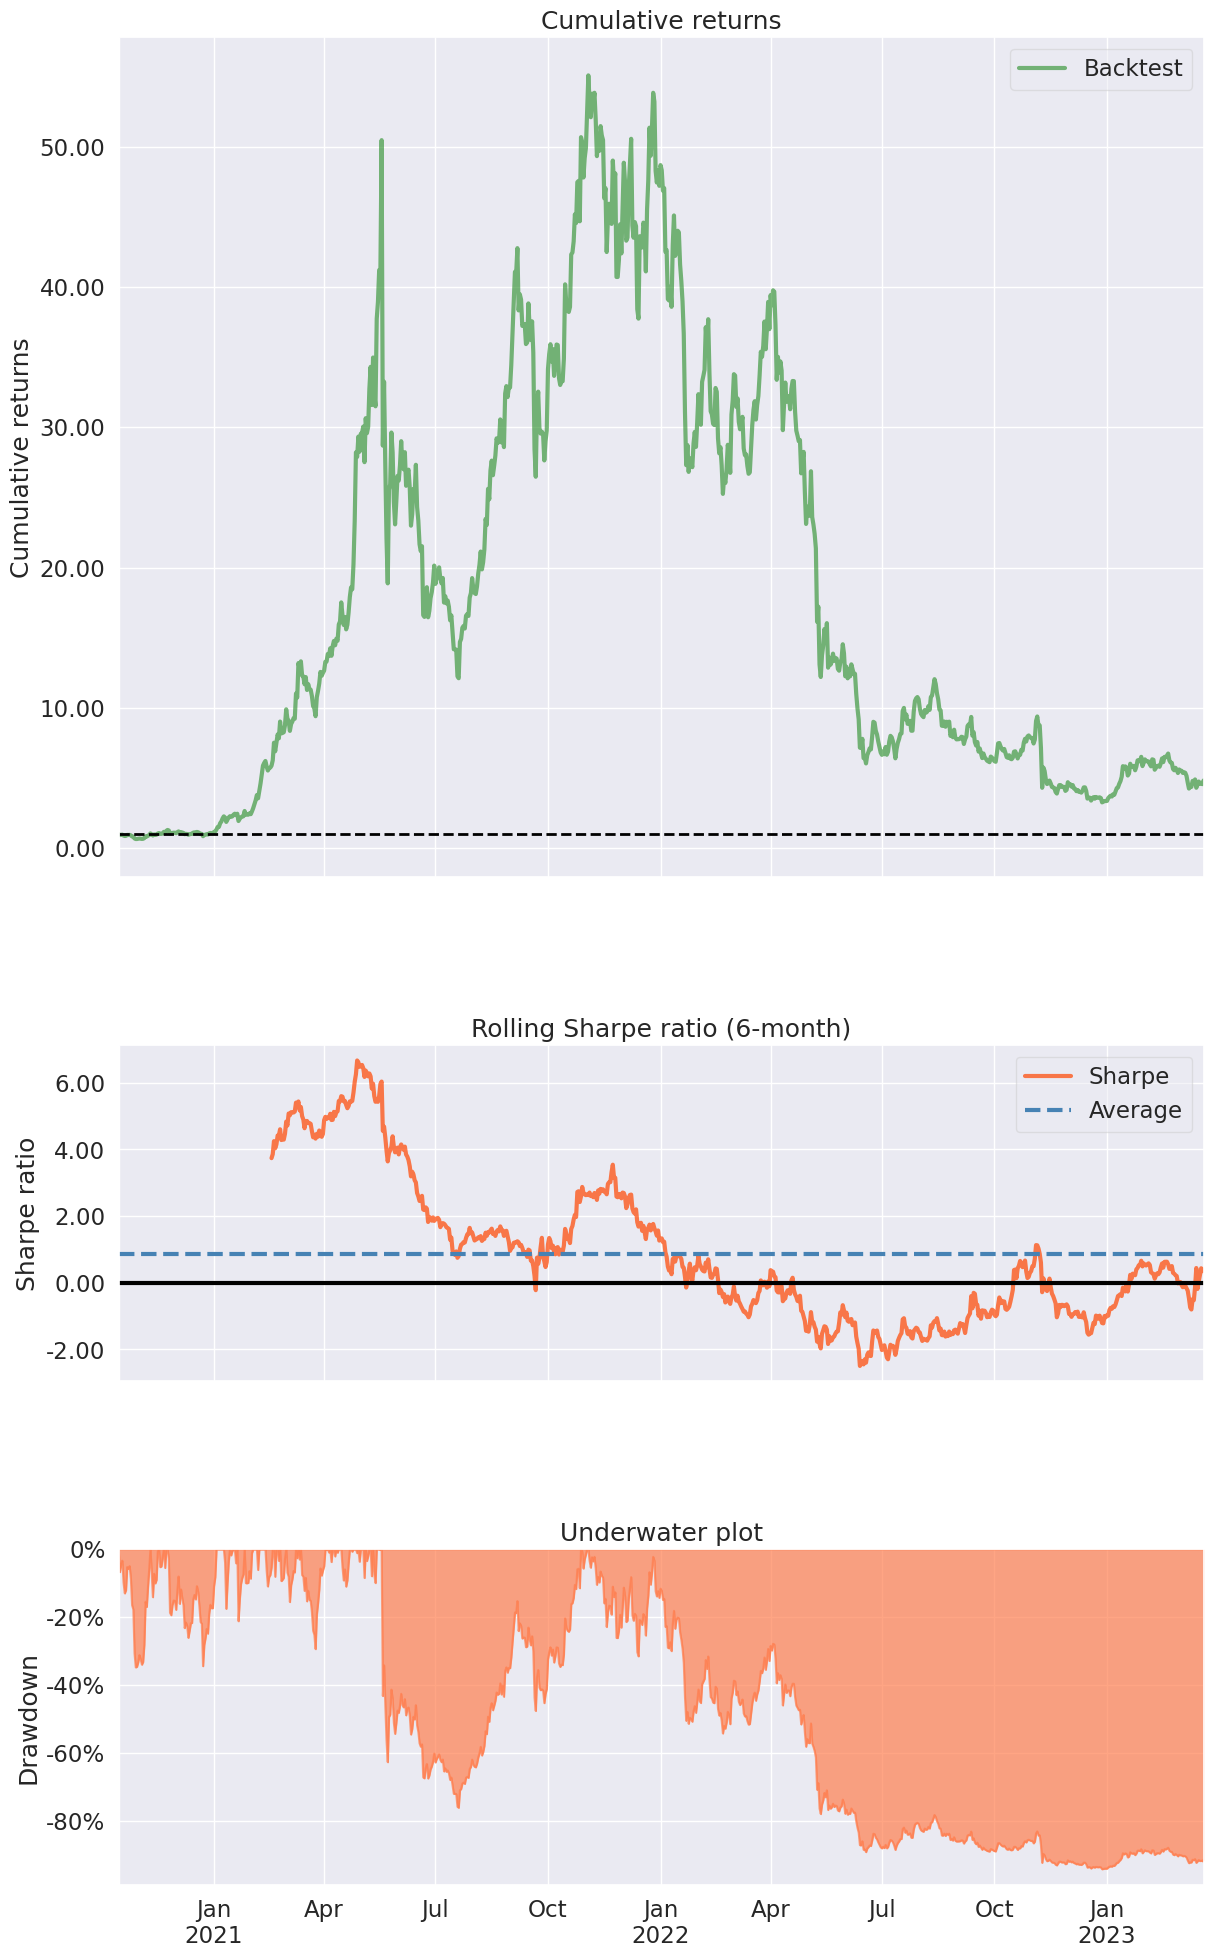

In [329]:
#Create a performance tear sheet for the Maximum Sharpe Ratio Portfolio
print("Maximum Sharpe Ratio Portfolio Performance Tear Sheet:")
pf.create_simple_tear_sheet(max_sharpe_total_weighted_returns)

Minimum Volatility Portfolio Performance Tear Sheet:


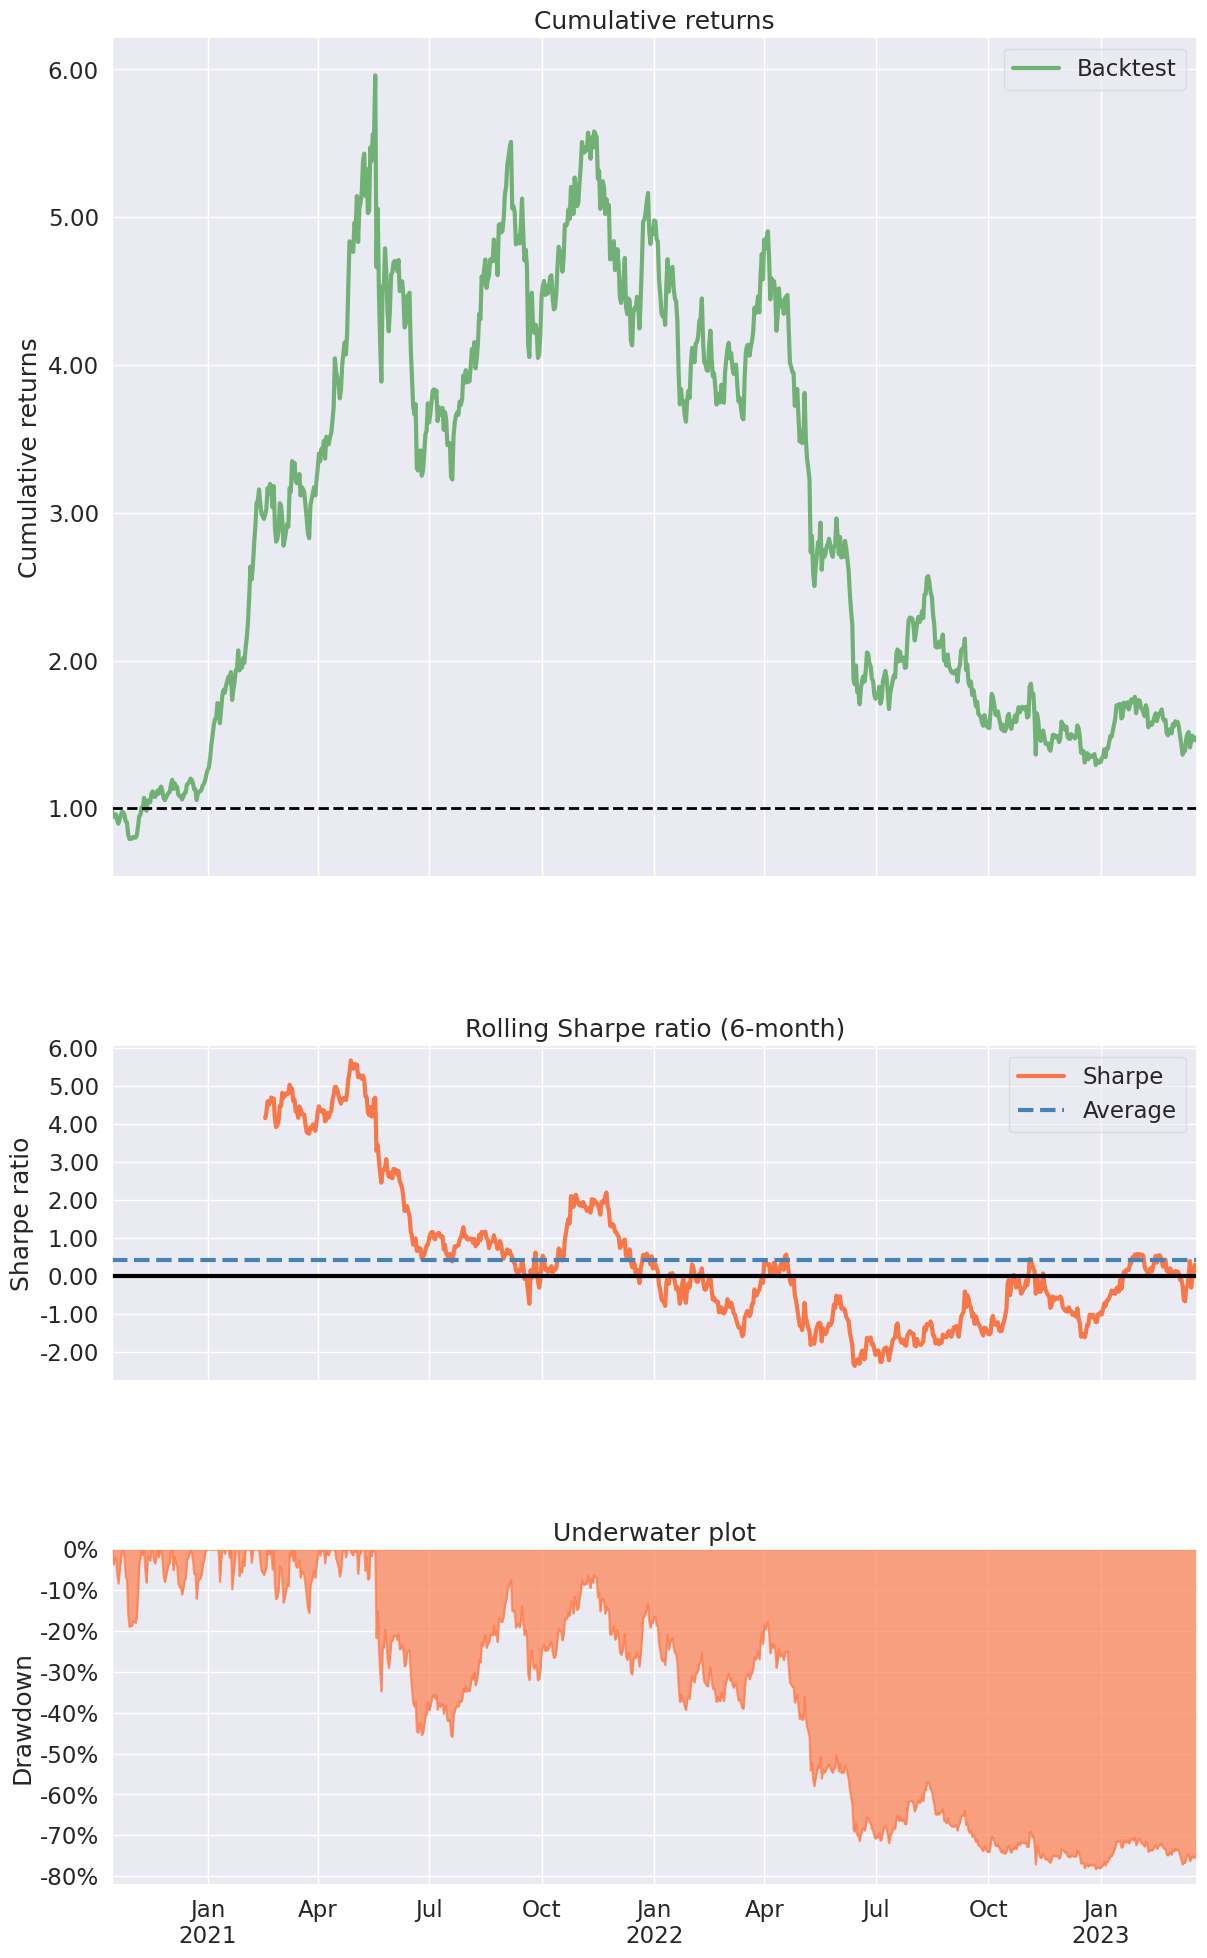

In [330]:
# Create a performance tear sheet for the Minimum Volatility Portfolio
print("Minimum Volatility Portfolio Performance Tear Sheet:")
pf.create_simple_tear_sheet(min_vol_total_weighted_returns)


Benchmark Portfolio Performance Tear Sheet:


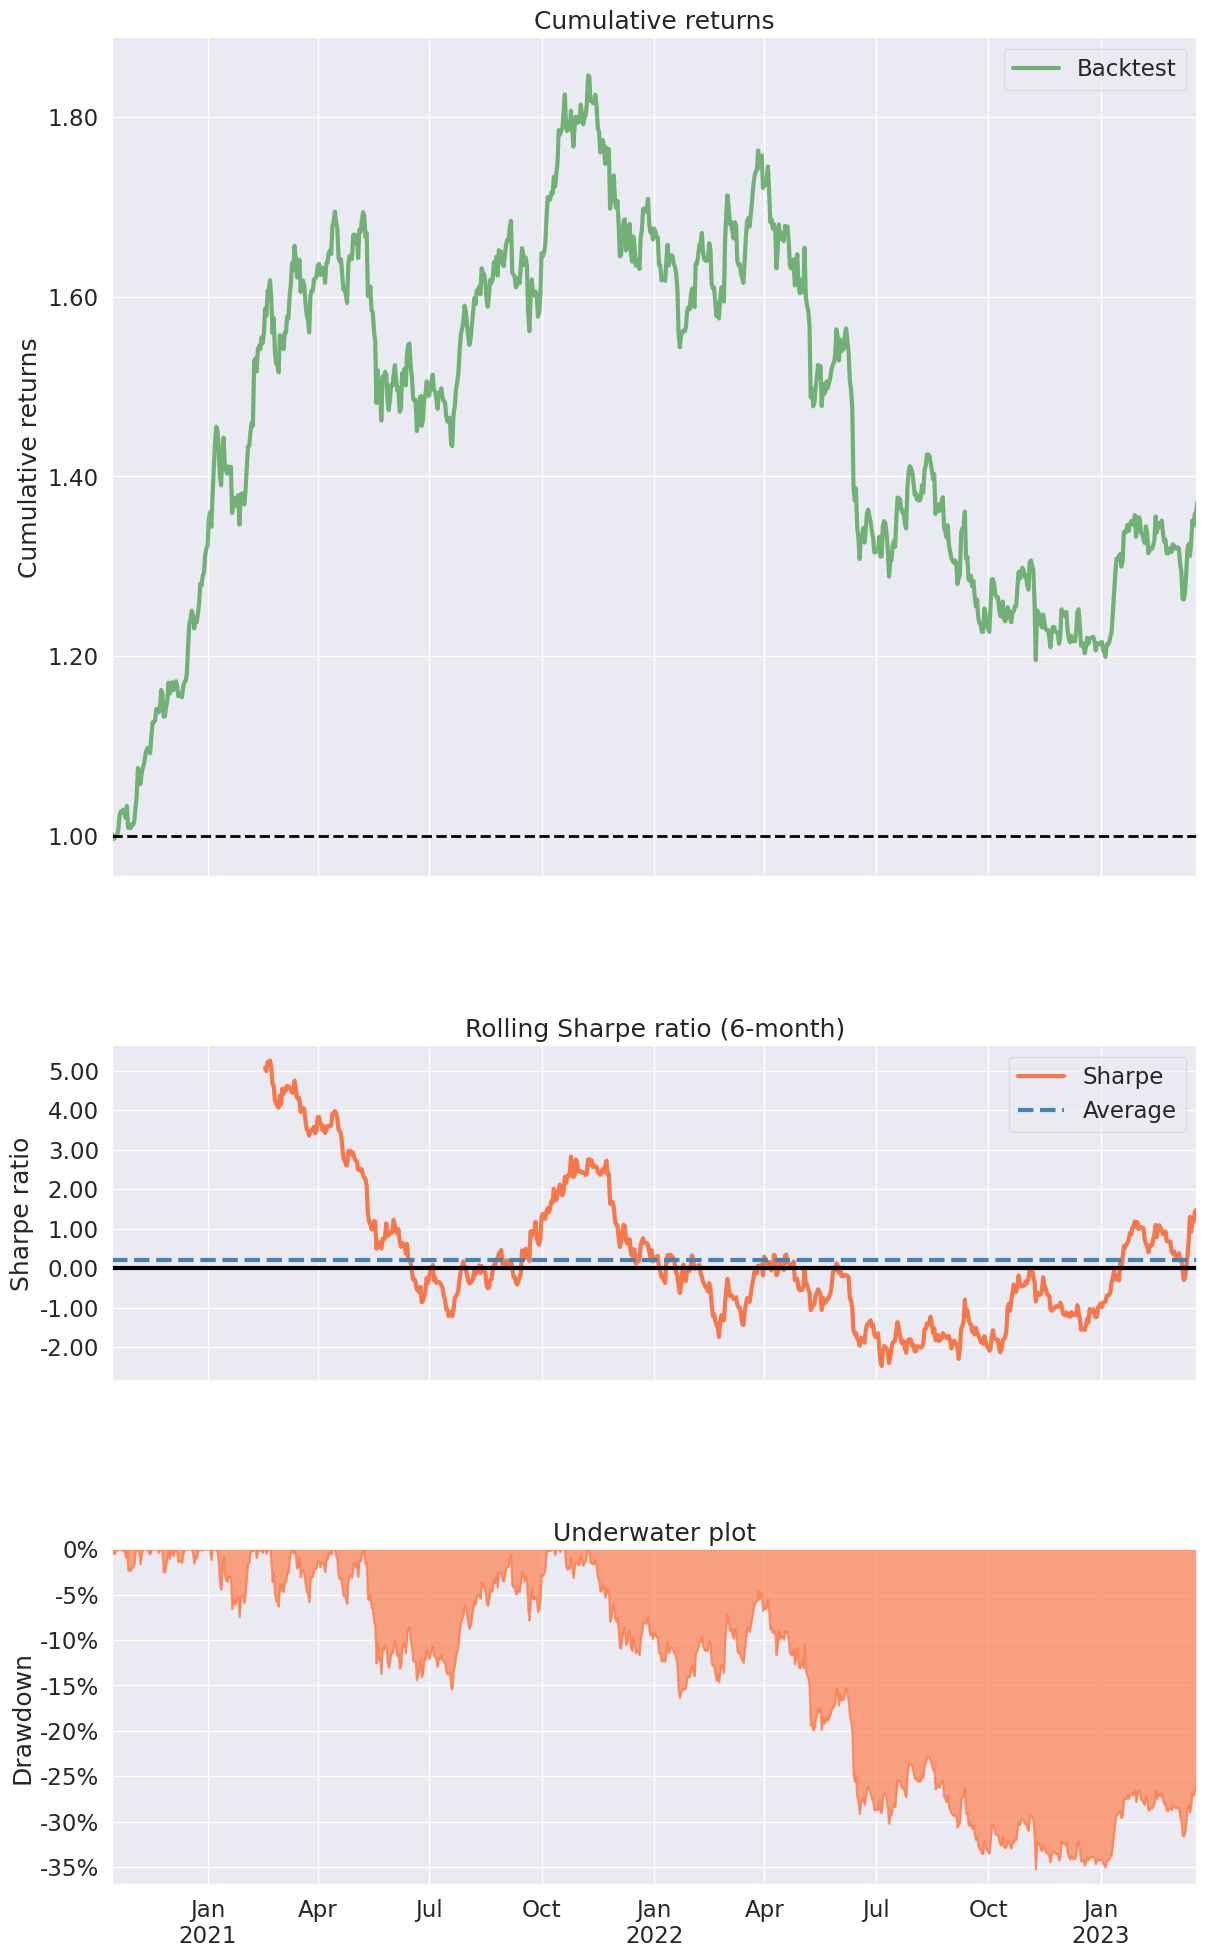

In [331]:
# Create a performance tear sheet for the benchmark portfolio
print("\nBenchmark Portfolio Performance Tear Sheet:")
pf.create_simple_tear_sheet(bench_portfolio_weighted_ret)

### Step 12: Conclusion and Review of Portfolio Performance against the Benchmark Portfolio
Based on the tear sheet metrics for the Maximum Sharpe Ratio, Minimum Volatility, and Benchmark portfolios, here's a brief analysis:

#### Maximum Sharpe Ratio Portfolio:
* Highest annual return of 56.3%, significantly outperforming the other portfolios
* Highest cumulative returns of 382.4%
* Highest annual volatility of 110.9%, indicating a much riskier portfolio compared to the others
* Sharpe ratio of 0.97, reflecting higher returns per unit of risk than the other portfolios
* Highest maximum drawdown of -94.1%, which shows the largest potential loss experienced by this portfolio

#### Minimum Volatility Portfolio:
* Moderate annual return of 11.9%, higher than the benchmark but much lower than the Maximum Sharpe Ratio Portfolio
* Cumulative returns of 48.4%, placing it between the other two portfolios
* Annual volatility of 59.2%, indicating lower risk than the Maximum Sharpe Ratio Portfolio but higher risk compared to the benchmark
* Sharpe ratio of 0.49, showing lower risk-adjusted returns than the other portfolios
* Maximum drawdown of -78.3%, which is lower than the Maximum Sharpe Ratio Portfolio but still significant

#### Benchmark Portfolio:
* Lowest annual return of 9.4%, underperforming the other two portfolios
* Cumulative returns of 37.1%, the lowest among the three portfolios
* Lowest annual volatility of 18.5%, indicating the least risky portfolio
* Sharpe ratio of 0.58, which is higher than the Minimum Volatility Portfolio but lower than the Maximum Sharpe Ratio Portfolio
* Lowest maximum drawdown of -35.2%, indicating the lowest potential loss among the three portfolios

### Conclusion:
In conclusion, the application we ran provided two alternative portfolios - the Maximum Sharpe Ratio Portfolio and the Minimum Volatility Portfolio. Both of these portfolios outperformed the Benchmark Portfolio in terms of returns, but with varying risk profiles.

The Maximum Sharpe Ratio Portfolio significantly outperformed the Benchmark Portfolio, delivering an annual return of 56.3% compared to the benchmark's 9.4%. However, it also exhibited a much higher risk, with an annual volatility of 110.9% and a maximum drawdown of -94.1%. This portfolio may be suitable for investors who are willing to assume higher risk in pursuit of higher returns.

The Minimum Volatility Portfolio also outperformed the Benchmark Portfolio, albeit to a lesser extent, with an annual return of 11.9% compared to the benchmark's 9.4%. The risk associated with this portfolio is higher than that of the benchmark, with an annual volatility of 59.2% and a maximum drawdown of -78.3%, but lower than the Maximum Sharpe Ratio Portfolio. This portfolio may be a better fit for investors seeking modestly higher returns with a slightly higher risk profile compared to the benchmark.

Overall, the application has provided two portfolios that outperform the Benchmark Portfolio in terms of returns, catering to different risk tolerances. It's essential for investors to carefully consider their investment objectives and risk appetite before selecting the most suitable portfolio.